<a href="https://colab.research.google.com/github/swagat123/beer_analysis/blob/main/bear_data_read.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [335]:
#First we import all the necessary packages and libraries

import pandas as pd
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.mlab as mlab
import datetime 
import re


import os

import warnings
warnings.filterwarnings(action = 'ignore')

import nltk
from nltk.corpus import stopwords
from textblob import Word, TextBlob

nltk.download('stopwords')
nltk.download('wordnet')
stop_words = stopwords.words('english')
nltk.download('omw-1.4')
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import CountVectorizer

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

nltk.download('vader_lexicon')

lem = WordNetLemmatizer()

%matplotlib inline

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [2]:
from google.colab import drive
drive.mount('/content/drive')
basepath = "/content/drive/My Drive/Colab Notebooks/beer_analysis/"
file = os.path.join(basepath,"BeerDataScienceProject.csv")

Mounted at /content/drive


In [3]:
import chardet
with open(file, 'rb') as rawdata:
    result = chardet.detect(rawdata.read(100000))
display(result)

{'encoding': 'ISO-8859-1', 'confidence': 0.73, 'language': ''}



- Add encoding format
- check the dataframe columns and record count
- check header data







In [242]:
#Import the dataset
beer_df=pd.read_csv(file,encoding='ISO-8859-1')
display(beer_df.shape)
display(beer_df.head())

(528870, 13)

,beer_ABV,beer_beerId,beer_brewerId,beer_name,beer_style,review_appearance,review_palette,review_overall,review_taste,review_profileName,review_aroma,review_text,review_time
0,5.0,47986,10325,Sausa Weizen,Hefeweizen,2.5,2.0,1.5,1.5,stcules,1.5,"A lot of foam. But a lot. In the smell some banana, and then lactic and tart. Not a good start. Quite dark orange in color, with a lively carbonation (now visible, under the foam). Again tending to lactic sourness. Same for the taste. With some yeast and banana.",1234817823
1,6.2,48213,10325,Red Moon,English Strong Ale,3.0,2.5,3.0,3.0,stcules,3.0,"Dark red color, light beige foam, average. In the smell malt and caramel, not really light. Again malt and caramel in the taste, not bad in the end. Maybe a note of honey in teh back, and a light fruitiness. Average body. In the aftertaste a light bitterness, with the malt and red fruit. Nothing exceptional, but not bad, drinkable beer.",1235915097
2,6.5,48215,10325,Black Horse Black Beer,Foreign / Export Stout,3.0,2.5,3.0,3.0,stcules,3.0,"Almost totally black. Beige foam, quite compact, not bad. Light smell, just a bit of roast, and some hop. A bit too light. The taste is light oo, and drinkable, with some malt, roast, hints of coffee. Nothing exceptional, but after all drinkable and pleasant. Light to average body. In the aftertaste some dust, somr roast, hint of caramel, and a bit of bitterness. No defect, drinkable, not bad.",1235916604
3,5.0,47969,10325,Sausa Pils,German Pilsener,3.5,3.0,3.0,2.5,stcules,3.0,"Golden yellow color. White, compact foam, quite creamy. Good appearance. Fresh smell, with good hop. Quite dry, with a good grassy note. Hay. Fresh and pleasant. More sweet in the mouth, with honey. The hop comes back in the end, and in the aftertaste. Not bad, but a bit too sweet for a pils. In the end some vanilla and camomile note. In the aftertaste, too. Though the hop, a bit too sweet. Honest.",1234725145
4,7.7,64883,1075,Cauldron DIPA,American Double / Imperial IPA,4.0,4.5,4.0,4.0,johnmichaelsen,4.5,"According to the website, the style for the Caldera Cauldron changes every year. The current release is a DIPA, which frankly is the only cauldron I'm familiar with (it was an IPA/DIPA the last time I ordered a cauldron at the horsebrass several years back). In any event... at the Horse Brass yesterday. The beer pours an orange copper color with good head retention and lacing. The nose is all hoppy IPA goodness, showcasing a huge aroma of dry citrus, pine and sandlewood. The flavor profile replicates the nose pretty closely in this West Coast all the way DIPA. This DIPA is not for the faint of heart and is a bit much even for a hophead like myslf. The finish is quite dry and hoppy, and there's barely enough sweet malt to balance and hold up the avalanche of hoppy bitterness in this beer. Mouthfeel is actually fairly light, with a long, persistentely bitter finish. Drinkability is good, with the alcohol barely noticeable in this well crafted beer. Still, this beer is so hugely hoppy/bitter, it's really hard for me to imagine ordering more than a single glass. Regardless, this is a very impressive beer from the folks at Caldera.",1293735206


In [243]:
beer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 528870 entries, 0 to 528869
Data columns (total 13 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   beer_ABV            508590 non-null  float64
 1   beer_beerId         528870 non-null  int64  
 2   beer_brewerId       528870 non-null  int64  
 3   beer_name           528870 non-null  object 
 4   beer_style          528870 non-null  object 
 5   review_appearance   528870 non-null  float64
 6   review_palette      528870 non-null  float64
 7   review_overall      528870 non-null  float64
 8   review_taste        528870 non-null  float64
 9   review_profileName  528755 non-null  object 
 10  review_aroma        528870 non-null  float64
 11  review_text         528751 non-null  object 
 12  review_time         528870 non-null  int64  
dtypes: float64(6), int64(3), object(4)
memory usage: 52.5+ MB


Check what are the categorical features

In [244]:

 beer_df.describe(exclude=np.number)

,beer_name,beer_style,review_profileName,review_text
count,528870,528870,528755,528751
unique,18339,104,22800,528371
top,Sierra Nevada Celebration Ale,American IPA,northyorksammy,#NAME?
freq,3000,43369,1858,92


- there are total 528870 beer name and beer_style data.
- There are unique 18339 beer name 
- There are 104 unique beer style 
- There are unique 22800 review profiler name 
- Most common beer name is Sierra Nevada Celebration Ale	
- Most common beer style is American IPA
- Most Common review profiler name is northyorksammy	

statsitcal details for numerical variables

In [245]:
beer_df.describe()

,beer_ABV,beer_beerId,beer_brewerId,review_appearance,review_palette,review_overall,review_taste,review_aroma,review_time
count,508590.000000,528870.000000,528870.000000,528870.000000,528870.000000,528870.000000,528870.000000,528870.000000,5.288700e+05
mean,7.017442,22098.466016,2598.423429,3.864522,3.758926,3.833197,3.765993,3.817350,1.224885e+09
std,2.204460,22158.284352,5281.805350,0.604010,0.685335,0.709962,0.669018,0.718903,7.605600e+07
min,0.010000,3.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,8.843904e+08
25%,5.300000,1745.000000,132.000000,3.500000,3.500000,3.500000,3.500000,3.500000,1.174613e+09
50%,6.500000,14368.000000,394.000000,4.000000,4.000000,4.000000,4.000000,4.000000,1.240366e+09
75%,8.500000,40528.000000,1475.000000,4.000000,4.000000,4.500000,4.000000,4.500000,1.288560e+09
max,57.700000,77310.000000,27980.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1.326277e+09


check the null values in the data frame

In [246]:
beer_df.isnull().sum()

beer_ABV              20280
beer_beerId               0
beer_brewerId             0
beer_name                 0
beer_style                0
review_appearance         0
review_palette            0
review_overall            0
review_taste              0
review_profileName      115
review_aroma              0
review_text             119
review_time               0
dtype: int64

- total 3 features has missing values. These are beer_ABV , review_profileName and review_text.


In [247]:
(beer_df.isna().sum()/len(beer_df)) * 100

beer_ABV              3.834591
beer_beerId           0.000000
beer_brewerId         0.000000
beer_name             0.000000
beer_style            0.000000
review_appearance     0.000000
review_palette        0.000000
review_overall        0.000000
review_taste          0.000000
review_profileName    0.021744
review_aroma          0.000000
review_text           0.022501
review_time           0.000000
dtype: float64

out of total record 3.8% missing values is from beer_ABV, where as review profile Name and review text contribute only 0.02%

Feature engineering 

In [248]:
beer_df.loc[beer_df['review_profileName'].isna(),'review_profileName'] = beer_df['review_profileName'].fillna(beer_df['review_profileName'].mode()[0])
display(beer_df['review_profileName'].mode()[0])

'northyorksammy'

fill null values of profiler name with most frequnecy value

In [249]:
(beer_df.isna().sum()/len(beer_df)) * 100

beer_ABV              3.834591
beer_beerId           0.000000
beer_brewerId         0.000000
beer_name             0.000000
beer_style            0.000000
review_appearance     0.000000
review_palette        0.000000
review_overall        0.000000
review_taste          0.000000
review_profileName    0.000000
review_aroma          0.000000
review_text           0.022501
review_time           0.000000
dtype: float64

In [250]:
beer_df.loc[beer_df['review_text'].isna(),'review_text'] = beer_df['review_text'].fillna(beer_df['review_text'].mode()[0])
display(beer_df['review_text'].mode()[0])

'#NAME?'

fill null values of review text with most frequecny value

In [251]:
(beer_df.isna().sum()/len(beer_df)) * 100

beer_ABV              3.834591
beer_beerId           0.000000
beer_brewerId         0.000000
beer_name             0.000000
beer_style            0.000000
review_appearance     0.000000
review_palette        0.000000
review_overall        0.000000
review_taste          0.000000
review_profileName    0.000000
review_aroma          0.000000
review_text           0.000000
review_time           0.000000
dtype: float64

Check if same beer name has mutiple beer ABV value

In [252]:
display(beer_df[beer_df['beer_name']=='Sausa Weizen'].groupby('beer_name').beer_ABV	.nunique())

beer_name
Sausa Weizen    1
Name: beer_ABV, dtype: int64

Create a new data frame with beer_name and beer_ABV

In [253]:
abv_df=beer_df.loc[:,['beer_name','beer_ABV']]

In [254]:
abv_df.head()

,beer_name,beer_ABV
0,Sausa Weizen,5.0
1,Red Moon,6.2
2,Black Horse Black Beer,6.5
3,Sausa Pils,5.0
4,Cauldron DIPA,7.7


In [255]:
display("the number of unique values beer abv:" ,len(abv_df['beer_ABV'].value_counts()))
display("the number of unique values beer name:",len(abv_df['beer_name'].value_counts()))

'the number of unique values beer abv:'

283

'the number of unique values beer name:'

18339

create a not null pandas data frame for beer name and beer abv

In [256]:
abv_notnull_df = abv_df[abv_df[['beer_ABV', 'beer_name']].notnull().all(1)]

In [257]:
display(abv_notnull_df.head())
display(abv_notnull_df.isnull().sum())
display(abv_notnull_df.shape)

,beer_name,beer_ABV
0,Sausa Weizen,5.0
1,Red Moon,6.2
2,Black Horse Black Beer,6.5
3,Sausa Pils,5.0
4,Cauldron DIPA,7.7


beer_name    0
beer_ABV     0
dtype: int64

(508590, 2)

In [258]:
display(abv_notnull_df[abv_notnull_df['beer_name']=='Anisocoria'])

,beer_name,beer_ABV
435857,Anisocoria,18.0
435858,Anisocoria,18.0
435859,Anisocoria,18.0
435860,Anisocoria,18.0


In [259]:
display(abv_notnull_df.shape)

(508590, 2)

In [260]:
abv_mode_df=abv_notnull_df.groupby(['beer_name', 'beer_ABV']).size()

In [23]:
display(abv_mode_df.head())

beer_name                               beer_ABV
"100" Pale Ale                          6.6         1
"33" Export                             4.8         3
"76" Anniversary Ale                    7.6         3
"76" Anniversary Ale With English Hops  7.6         1
"Fade To Black" Porter                  5.6         1
dtype: int64

In [24]:
# abv_notnull_df['beer_ABV_mode'] = 
#abv_mode_df = abv_notnull_df.groupby(['beer_name'])['beer_ABV'].apply(pd.Series.mode)



Check if any review over all is < 0

In [261]:
display(beer_df[(beer_df['review_overall'] < 0)])

,beer_ABV,beer_beerId,beer_brewerId,beer_name,beer_style,review_appearance,review_palette,review_overall,review_taste,review_profileName,review_aroma,review_text,review_time


In [263]:
display(beer_df.shape)

(528870, 13)

We do not have any over all negative reviews.

In [264]:
# abv_mode_df.columns=['beer_name','abv_val','beer_ABV']
type(abv_mode_df)


pandas.core.series.Series

In [265]:
# abv_mode_data_df=pd.DataFrame(data=abv_mode_df.tolist(), columns=['beer_name','abv_val','beer_ABV'])
abv_mode_data_df = abv_mode_df.to_frame().reset_index()

In [266]:
abv_mode_data_df.head()

,beer_name,beer_ABV,0
0,"""100"" Pale Ale",6.6,1
1,"""33"" Export",4.8,3
2,"""76"" Anniversary Ale",7.6,3
3,"""76"" Anniversary Ale With English Hops",7.6,1
4,"""Fade To Black"" Porter",5.6,1


In [267]:
abv_mode_data_df[abv_mode_data_df['beer_name']=='Cauldron Espresso Stout']

,beer_name,beer_ABV,0


In [278]:
display(abv_mode_data_df.isnull().sum())
display(abv_mode_data_df.shape)

beer_name    0
beer_ABV     0
0            0
dtype: int64

(14722, 3)

take the backup for testing

In [295]:
test_df =beer_df.copy()
display(test_df.shape)
display(test_df.isnull().sum())

(528870, 13)

beer_ABV              20280
beer_beerId               0
beer_brewerId             0
beer_name                 0
beer_style                0
review_appearance         0
review_palette            0
review_overall            0
review_taste              0
review_profileName        0
review_aroma              0
review_text               0
review_time               0
dtype: int64

fill the null bear ABV value 

In [296]:
test_df["beer_ABV"]=test_df['beer_ABV'].fillna(test_df["beer_name"].map(abv_mode_data_df.drop_duplicates('beer_name').set_index('beer_name')['beer_ABV']))

In [297]:
display(test_df.shape)
display(test_df.isnull().sum())

(528870, 13)

beer_ABV              17920
beer_beerId               0
beer_brewerId             0
beer_name                 0
beer_style                0
review_appearance         0
review_palette            0
review_overall            0
review_taste              0
review_profileName        0
review_aroma              0
review_text               0
review_time               0
dtype: int64

In [298]:
test_df.head()

,beer_ABV,beer_beerId,beer_brewerId,beer_name,beer_style,review_appearance,review_palette,review_overall,review_taste,review_profileName,review_aroma,review_text,review_time
0,5.0,47986,10325,Sausa Weizen,Hefeweizen,2.5,2.0,1.5,1.5,stcules,1.5,"A lot of foam. But a lot. In the smell some banana, and then lactic and tart. Not a good start. Quite dark orange in color, with a lively carbonation (now visible, under the foam). Again tending to lactic sourness. Same for the taste. With some yeast and banana.",1234817823
1,6.2,48213,10325,Red Moon,English Strong Ale,3.0,2.5,3.0,3.0,stcules,3.0,"Dark red color, light beige foam, average. In the smell malt and caramel, not really light. Again malt and caramel in the taste, not bad in the end. Maybe a note of honey in teh back, and a light fruitiness. Average body. In the aftertaste a light bitterness, with the malt and red fruit. Nothing exceptional, but not bad, drinkable beer.",1235915097
2,6.5,48215,10325,Black Horse Black Beer,Foreign / Export Stout,3.0,2.5,3.0,3.0,stcules,3.0,"Almost totally black. Beige foam, quite compact, not bad. Light smell, just a bit of roast, and some hop. A bit too light. The taste is light oo, and drinkable, with some malt, roast, hints of coffee. Nothing exceptional, but after all drinkable and pleasant. Light to average body. In the aftertaste some dust, somr roast, hint of caramel, and a bit of bitterness. No defect, drinkable, not bad.",1235916604
3,5.0,47969,10325,Sausa Pils,German Pilsener,3.5,3.0,3.0,2.5,stcules,3.0,"Golden yellow color. White, compact foam, quite creamy. Good appearance. Fresh smell, with good hop. Quite dry, with a good grassy note. Hay. Fresh and pleasant. More sweet in the mouth, with honey. The hop comes back in the end, and in the aftertaste. Not bad, but a bit too sweet for a pils. In the end some vanilla and camomile note. In the aftertaste, too. Though the hop, a bit too sweet. Honest.",1234725145
4,7.7,64883,1075,Cauldron DIPA,American Double / Imperial IPA,4.0,4.5,4.0,4.0,johnmichaelsen,4.5,"According to the website, the style for the Caldera Cauldron changes every year. The current release is a DIPA, which frankly is the only cauldron I'm familiar with (it was an IPA/DIPA the last time I ordered a cauldron at the horsebrass several years back). In any event... at the Horse Brass yesterday. The beer pours an orange copper color with good head retention and lacing. The nose is all hoppy IPA goodness, showcasing a huge aroma of dry citrus, pine and sandlewood. The flavor profile replicates the nose pretty closely in this West Coast all the way DIPA. This DIPA is not for the faint of heart and is a bit much even for a hophead like myslf. The finish is quite dry and hoppy, and there's barely enough sweet malt to balance and hold up the avalanche of hoppy bitterness in this beer. Mouthfeel is actually fairly light, with a long, persistentely bitter finish. Drinkability is good, with the alcohol barely noticeable in this well crafted beer. Still, this beer is so hugely hoppy/bitter, it's really hard for me to imagine ordering more than a single glass. Regardless, this is a very impressive beer from the folks at Caldera.",1293735206


In [299]:
test_df.isnull().sum()

beer_ABV              17920
beer_beerId               0
beer_brewerId             0
beer_name                 0
beer_style                0
review_appearance         0
review_palette            0
review_overall            0
review_taste              0
review_profileName        0
review_aroma              0
review_text               0
review_time               0
dtype: int64

still 17920 is having null values for beer_ABV , let's drop this null records


In [300]:
test_df.dropna(inplace=True)
display(test_df.head())
display(test_df.isnull().sum())
display(test_df.shape)

,beer_ABV,beer_beerId,beer_brewerId,beer_name,beer_style,review_appearance,review_palette,review_overall,review_taste,review_profileName,review_aroma,review_text,review_time
0,5.0,47986,10325,Sausa Weizen,Hefeweizen,2.5,2.0,1.5,1.5,stcules,1.5,"A lot of foam. But a lot. In the smell some banana, and then lactic and tart. Not a good start. Quite dark orange in color, with a lively carbonation (now visible, under the foam). Again tending to lactic sourness. Same for the taste. With some yeast and banana.",1234817823
1,6.2,48213,10325,Red Moon,English Strong Ale,3.0,2.5,3.0,3.0,stcules,3.0,"Dark red color, light beige foam, average. In the smell malt and caramel, not really light. Again malt and caramel in the taste, not bad in the end. Maybe a note of honey in teh back, and a light fruitiness. Average body. In the aftertaste a light bitterness, with the malt and red fruit. Nothing exceptional, but not bad, drinkable beer.",1235915097
2,6.5,48215,10325,Black Horse Black Beer,Foreign / Export Stout,3.0,2.5,3.0,3.0,stcules,3.0,"Almost totally black. Beige foam, quite compact, not bad. Light smell, just a bit of roast, and some hop. A bit too light. The taste is light oo, and drinkable, with some malt, roast, hints of coffee. Nothing exceptional, but after all drinkable and pleasant. Light to average body. In the aftertaste some dust, somr roast, hint of caramel, and a bit of bitterness. No defect, drinkable, not bad.",1235916604
3,5.0,47969,10325,Sausa Pils,German Pilsener,3.5,3.0,3.0,2.5,stcules,3.0,"Golden yellow color. White, compact foam, quite creamy. Good appearance. Fresh smell, with good hop. Quite dry, with a good grassy note. Hay. Fresh and pleasant. More sweet in the mouth, with honey. The hop comes back in the end, and in the aftertaste. Not bad, but a bit too sweet for a pils. In the end some vanilla and camomile note. In the aftertaste, too. Though the hop, a bit too sweet. Honest.",1234725145
4,7.7,64883,1075,Cauldron DIPA,American Double / Imperial IPA,4.0,4.5,4.0,4.0,johnmichaelsen,4.5,"According to the website, the style for the Caldera Cauldron changes every year. The current release is a DIPA, which frankly is the only cauldron I'm familiar with (it was an IPA/DIPA the last time I ordered a cauldron at the horsebrass several years back). In any event... at the Horse Brass yesterday. The beer pours an orange copper color with good head retention and lacing. The nose is all hoppy IPA goodness, showcasing a huge aroma of dry citrus, pine and sandlewood. The flavor profile replicates the nose pretty closely in this West Coast all the way DIPA. This DIPA is not for the faint of heart and is a bit much even for a hophead like myslf. The finish is quite dry and hoppy, and there's barely enough sweet malt to balance and hold up the avalanche of hoppy bitterness in this beer. Mouthfeel is actually fairly light, with a long, persistentely bitter finish. Drinkability is good, with the alcohol barely noticeable in this well crafted beer. Still, this beer is so hugely hoppy/bitter, it's really hard for me to imagine ordering more than a single glass. Regardless, this is a very impressive beer from the folks at Caldera.",1293735206


beer_ABV              0
beer_beerId           0
beer_brewerId         0
beer_name             0
beer_style            0
review_appearance     0
review_palette        0
review_overall        0
review_taste          0
review_profileName    0
review_aroma          0
review_text           0
review_time           0
dtype: int64

(510950, 13)

- Convert unix time to date time format  for review time .
- create new 'year' column and extract year from review time

In [301]:
test_df['review_time'] = test_df['review_time'].apply(lambda x :datetime.datetime.fromtimestamp(x).strftime('%Y-%m-%d %H:%M:%S'))
test_df['year'] = test_df['review_time'].apply(lambda x : x[0:4]).astype(int)

In [302]:
display(test_df.head())
display(test_df.dtypes)

,beer_ABV,beer_beerId,beer_brewerId,beer_name,beer_style,review_appearance,review_palette,review_overall,review_taste,review_profileName,review_aroma,review_text,review_time,year
0,5.0,47986,10325,Sausa Weizen,Hefeweizen,2.5,2.0,1.5,1.5,stcules,1.5,"A lot of foam. But a lot. In the smell some banana, and then lactic and tart. Not a good start. Quite dark orange in color, with a lively carbonation (now visible, under the foam). Again tending to lactic sourness. Same for the taste. With some yeast and banana.",2009-02-16 20:57:03,2009
1,6.2,48213,10325,Red Moon,English Strong Ale,3.0,2.5,3.0,3.0,stcules,3.0,"Dark red color, light beige foam, average. In the smell malt and caramel, not really light. Again malt and caramel in the taste, not bad in the end. Maybe a note of honey in teh back, and a light fruitiness. Average body. In the aftertaste a light bitterness, with the malt and red fruit. Nothing exceptional, but not bad, drinkable beer.",2009-03-01 13:44:57,2009
2,6.5,48215,10325,Black Horse Black Beer,Foreign / Export Stout,3.0,2.5,3.0,3.0,stcules,3.0,"Almost totally black. Beige foam, quite compact, not bad. Light smell, just a bit of roast, and some hop. A bit too light. The taste is light oo, and drinkable, with some malt, roast, hints of coffee. Nothing exceptional, but after all drinkable and pleasant. Light to average body. In the aftertaste some dust, somr roast, hint of caramel, and a bit of bitterness. No defect, drinkable, not bad.",2009-03-01 14:10:04,2009
3,5.0,47969,10325,Sausa Pils,German Pilsener,3.5,3.0,3.0,2.5,stcules,3.0,"Golden yellow color. White, compact foam, quite creamy. Good appearance. Fresh smell, with good hop. Quite dry, with a good grassy note. Hay. Fresh and pleasant. More sweet in the mouth, with honey. The hop comes back in the end, and in the aftertaste. Not bad, but a bit too sweet for a pils. In the end some vanilla and camomile note. In the aftertaste, too. Though the hop, a bit too sweet. Honest.",2009-02-15 19:12:25,2009
4,7.7,64883,1075,Cauldron DIPA,American Double / Imperial IPA,4.0,4.5,4.0,4.0,johnmichaelsen,4.5,"According to the website, the style for the Caldera Cauldron changes every year. The current release is a DIPA, which frankly is the only cauldron I'm familiar with (it was an IPA/DIPA the last time I ordered a cauldron at the horsebrass several years back). In any event... at the Horse Brass yesterday. The beer pours an orange copper color with good head retention and lacing. The nose is all hoppy IPA goodness, showcasing a huge aroma of dry citrus, pine and sandlewood. The flavor profile replicates the nose pretty closely in this West Coast all the way DIPA. This DIPA is not for the faint of heart and is a bit much even for a hophead like myslf. The finish is quite dry and hoppy, and there's barely enough sweet malt to balance and hold up the avalanche of hoppy bitterness in this beer. Mouthfeel is actually fairly light, with a long, persistentely bitter finish. Drinkability is good, with the alcohol barely noticeable in this well crafted beer. Still, this beer is so hugely hoppy/bitter, it's really hard for me to imagine ordering more than a single glass. Regardless, this is a very impressive beer from the folks at Caldera.",2010-12-30 18:53:26,2010


beer_ABV              float64
beer_beerId             int64
beer_brewerId           int64
beer_name              object
beer_style             object
review_appearance     float64
review_palette        float64
review_overall        float64
review_taste          float64
review_profileName     object
review_aroma          float64
review_text            object
review_time            object
year                    int64
dtype: object

In [303]:
## get review over all and revie time
new_data=test_df.copy()

In [304]:
display(new_data.dtypes)
display(new_data.shape)

beer_ABV              float64
beer_beerId             int64
beer_brewerId           int64
beer_name              object
beer_style             object
review_appearance     float64
review_palette        float64
review_overall        float64
review_taste          float64
review_profileName     object
review_aroma          float64
review_text            object
review_time            object
year                    int64
dtype: object

(510950, 14)

In [305]:
new_data['review_time'] =  pd.to_datetime(new_data['review_time'], infer_datetime_format=True)

In [306]:
new_data.dtypes

beer_ABV                     float64
beer_beerId                    int64
beer_brewerId                  int64
beer_name                     object
beer_style                    object
review_appearance            float64
review_palette               float64
review_overall               float64
review_taste                 float64
review_profileName            object
review_aroma                 float64
review_text                   object
review_time           datetime64[ns]
year                           int64
dtype: object

In [307]:
display(new_data.head())

,beer_ABV,beer_beerId,beer_brewerId,beer_name,beer_style,review_appearance,review_palette,review_overall,review_taste,review_profileName,review_aroma,review_text,review_time,year
0,5.0,47986,10325,Sausa Weizen,Hefeweizen,2.5,2.0,1.5,1.5,stcules,1.5,"A lot of foam. But a lot. In the smell some banana, and then lactic and tart. Not a good start. Quite dark orange in color, with a lively carbonation (now visible, under the foam). Again tending to lactic sourness. Same for the taste. With some yeast and banana.",2009-02-16 20:57:03,2009
1,6.2,48213,10325,Red Moon,English Strong Ale,3.0,2.5,3.0,3.0,stcules,3.0,"Dark red color, light beige foam, average. In the smell malt and caramel, not really light. Again malt and caramel in the taste, not bad in the end. Maybe a note of honey in teh back, and a light fruitiness. Average body. In the aftertaste a light bitterness, with the malt and red fruit. Nothing exceptional, but not bad, drinkable beer.",2009-03-01 13:44:57,2009
2,6.5,48215,10325,Black Horse Black Beer,Foreign / Export Stout,3.0,2.5,3.0,3.0,stcules,3.0,"Almost totally black. Beige foam, quite compact, not bad. Light smell, just a bit of roast, and some hop. A bit too light. The taste is light oo, and drinkable, with some malt, roast, hints of coffee. Nothing exceptional, but after all drinkable and pleasant. Light to average body. In the aftertaste some dust, somr roast, hint of caramel, and a bit of bitterness. No defect, drinkable, not bad.",2009-03-01 14:10:04,2009
3,5.0,47969,10325,Sausa Pils,German Pilsener,3.5,3.0,3.0,2.5,stcules,3.0,"Golden yellow color. White, compact foam, quite creamy. Good appearance. Fresh smell, with good hop. Quite dry, with a good grassy note. Hay. Fresh and pleasant. More sweet in the mouth, with honey. The hop comes back in the end, and in the aftertaste. Not bad, but a bit too sweet for a pils. In the end some vanilla and camomile note. In the aftertaste, too. Though the hop, a bit too sweet. Honest.",2009-02-15 19:12:25,2009
4,7.7,64883,1075,Cauldron DIPA,American Double / Imperial IPA,4.0,4.5,4.0,4.0,johnmichaelsen,4.5,"According to the website, the style for the Caldera Cauldron changes every year. The current release is a DIPA, which frankly is the only cauldron I'm familiar with (it was an IPA/DIPA the last time I ordered a cauldron at the horsebrass several years back). In any event... at the Horse Brass yesterday. The beer pours an orange copper color with good head retention and lacing. The nose is all hoppy IPA goodness, showcasing a huge aroma of dry citrus, pine and sandlewood. The flavor profile replicates the nose pretty closely in this West Coast all the way DIPA. This DIPA is not for the faint of heart and is a bit much even for a hophead like myslf. The finish is quite dry and hoppy, and there's barely enough sweet malt to balance and hold up the avalanche of hoppy bitterness in this beer. Mouthfeel is actually fairly light, with a long, persistentely bitter finish. Drinkability is good, with the alcohol barely noticeable in this well crafted beer. Still, this beer is so hugely hoppy/bitter, it's really hard for me to imagine ordering more than a single glass. Regardless, this is a very impressive beer from the folks at Caldera.",2010-12-30 18:53:26,2010


Let's Plot few features

Beer style plot

In [308]:
#new_data['beer_style'].value_counts().head(20).plot.bar(figsize=(16,5),title= 'Poular Beers by Style')

beer_style = new_data['beer_style'].value_counts().head(20)
beer_style = beer_style.to_frame().reset_index()



In [309]:
# beer_style.coulmns=['Beer_Style','Count']
beer_style.rename(columns={'index': 'Beer_Style','beer_style':'Count'}, inplace=True)
beer_style

,Beer_Style,Count
0,American IPA,42251
1,American Double / Imperial IPA,25819
2,American Double / Imperial Stout,23212
3,American Pale Ale (APA),19079
4,American Amber / Red Ale,17749
5,Russian Imperial Stout,16993
6,American Porter,15615
7,Belgian Strong Dark Ale,15326
8,Fruit / Vegetable Beer,14714
9,Witbier,13294


Text(0.5, 1.0, 'Top 20 Most Poular Beers by Style')

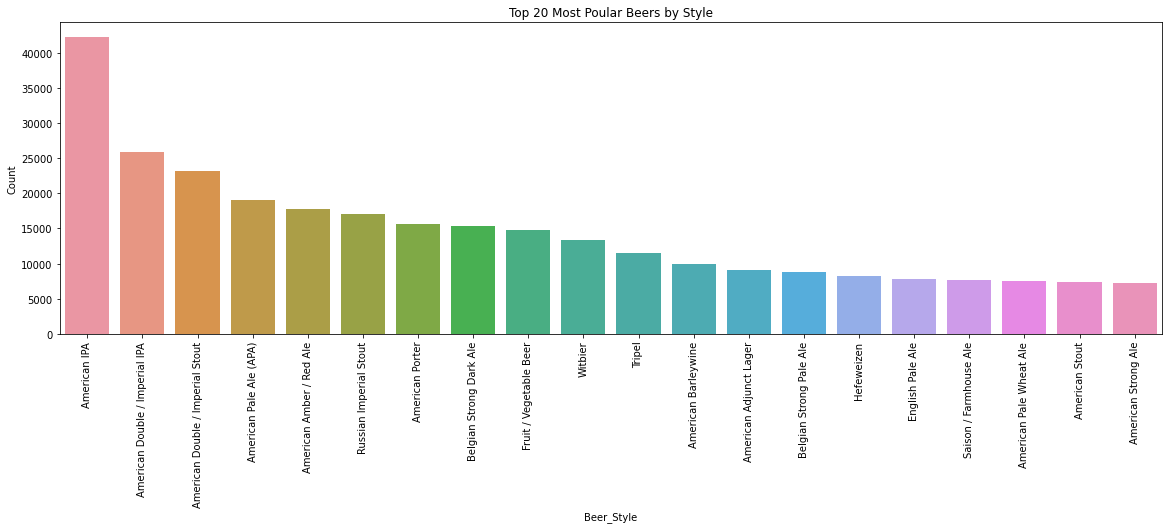

In [310]:
plt.figure(figsize=(16,5))
plt.xticks(rotation=90)
plt.tight_layout()
sns.barplot(x='Beer_Style', y='Count', data=beer_style).set_title('Top 20 Most Poular Beers by Style')

Beers by Name

In [311]:
beer_name = new_data['beer_name'].value_counts().head(20)
beer_name = beer_name.to_frame().reset_index()
beer_name.rename(columns={'index': 'Beer_Name','beer_name':'Count'}, inplace=True)
beer_name


,Beer_Name,Count
0,Sierra Nevada Celebration Ale,3000
1,Sierra Nevada Pale Ale,2587
2,Founders Breakfast Stout,2502
3,Sierra Nevada Bigfoot Barleywine Style Ale,2492
4,La Fin Du Monde,2483
5,Samuel Adams Boston Lager,2418
6,Chocolate Stout,2254
7,Dead Guy Ale,2234
8,Trappistes Rochefort 10,2170
9,Sierra Nevada Torpedo Extra IPA,2029


Text(0.5, 1.0, 'Top 20 Most Poular Beers by Name')

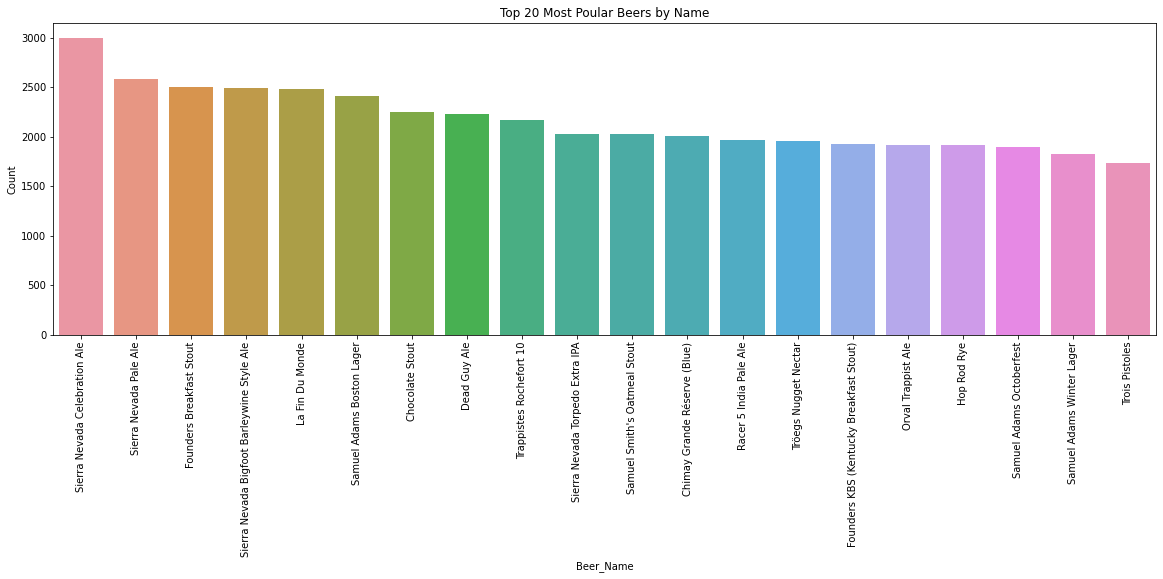

In [312]:
plt.figure(figsize=(16,5))
plt.xticks(rotation=90)
plt.tight_layout()
sns.barplot(x='Beer_Name', y='Count', data=beer_name).set_title('Top 20 Most Poular Beers by Name')

Plot the probability density function (PDF) for numerical feature

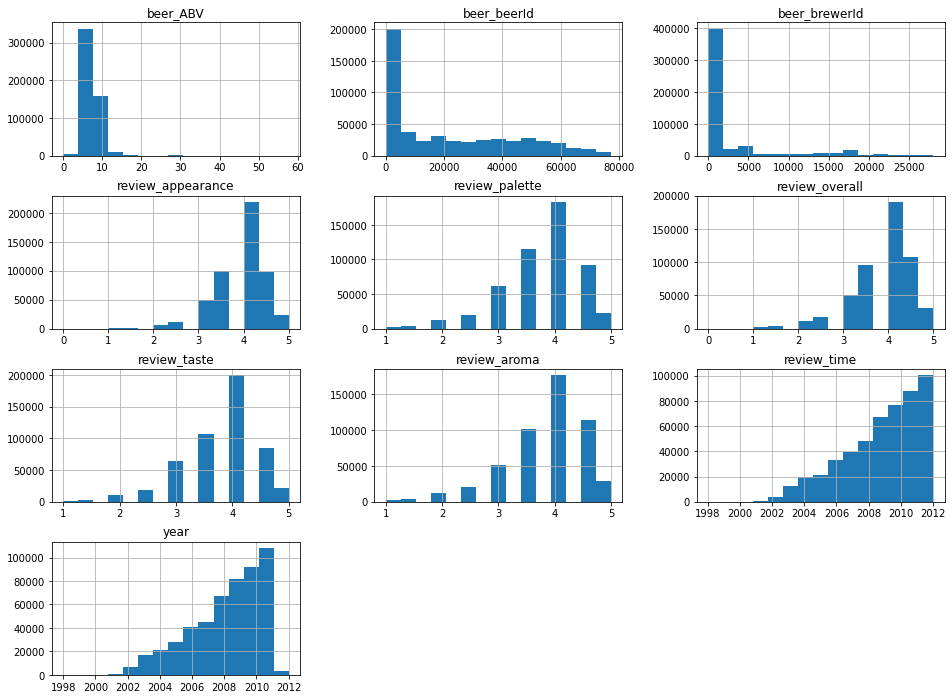

In [313]:
new_data.hist(bins = 15,figsize=(16,12))
plt.show()

Top selling brewer id , as in the data set brewer name is not given

In [314]:
beer_brewerId = new_data['beer_brewerId'].value_counts().sort_values(ascending=False).head(20)
beer_brewerId = beer_brewerId.to_frame().reset_index()
beer_brewerId.rename(columns={'index': 'BrewerId','beer_brewerId':'Count'}, inplace=True)
beer_brewerId

,BrewerId,Count
0,35,38814
1,140,28656
2,132,23450
3,1199,19955
4,3818,15858
5,158,14915
6,22,13921
7,192,13353
8,392,12205
9,68,11696


Text(0.5, 1.0, 'Top 20 Most Poular Brewer ID')

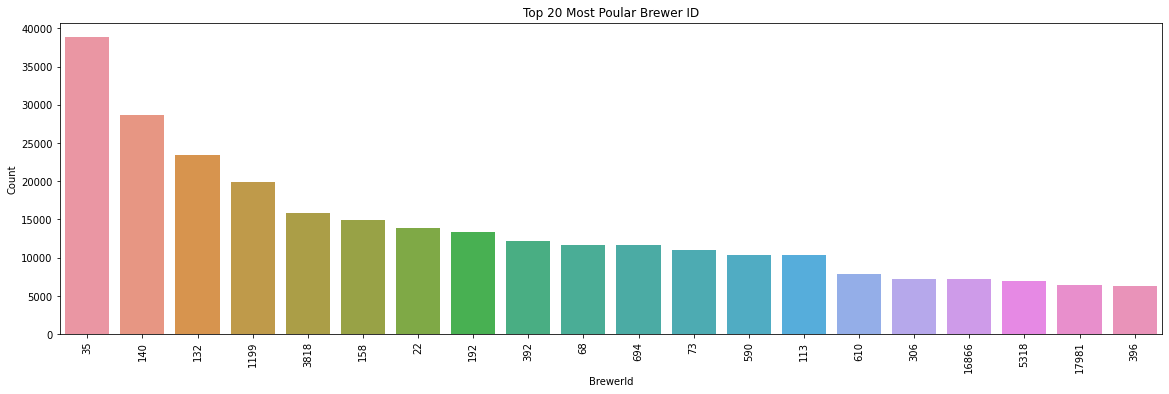

In [315]:
plt.figure(figsize=(16,5))
plt.xticks(rotation=90)
plt.tight_layout()
sns.barplot(x='BrewerId', y='Count', data=beer_brewerId,order=beer_brewerId.sort_values('Count',ascending = False).BrewerId).set_title('Top 20 Most Poular Brewer ID')


Beer Styles with respectiove to top ratings

In [316]:
Top_rating_beer_styles = new_data[['beer_style','review_overall']].groupby('beer_style').review_overall.agg('mean').sort_values(ascending = False).iloc[0:10]
Top_rating_beer_styles = pd.DataFrame(Top_rating_beer_styles).reset_index()
Top_rating_beer_styles


,beer_style,review_overall
0,Gueuze,4.140724
1,Berliner Weissbier,4.119225
2,American Double / Imperial Stout,4.100875
3,Oatmeal Stout,4.091437
4,Eisbock,4.082474
5,Rye Beer,4.073832
6,Dortmunder / Export Lager,4.072258
7,Quadrupel (Quad),4.052010
8,Roggenbier,4.045455
9,Lambic - Fruit,4.032769


- Based on overall review Gueuze beer style is the top rank with average ovall all review 4.140724
- second rank is Berliner Weissbier with average review 4.117037 and 3rd is American Double / Imperial Stout	 with average review 4.092209

Top 10 brewer ID with hightest ranking 

In [317]:
Top_beer_ratings = new_data[['beer_brewerId','review_overall']].groupby('beer_brewerId').review_overall.agg('mean').sort_values(ascending = False)
Top_beer_ratings = Top_beer_ratings.iloc[0:10]
Top_beer_ratings.reset_index()

,beer_brewerId,review_overall
0,387,5.00
1,397,5.00
2,3700,5.00
3,13866,5.00
4,24056,5.00
5,5961,5.00
6,6225,5.00
7,21109,5.00
8,12434,5.00
9,15193,4.75


Almost 8 brewer ID has the same avaverage overall review.

Let's check what is the distribution of beer_ABV

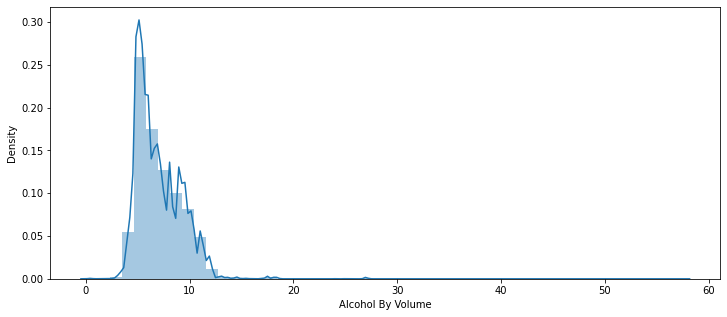

In [318]:
plt.figure(figsize=(12,5))
sns.distplot(new_data['beer_ABV'],bins = 50)
plt.xlabel("Alcohol By Volume")
plt.show()

- Almost all of the majority data in the distribution of 'beer_ABV' is between 5-10 with long tail towards right.
- Data is not perfectly normally distributed.

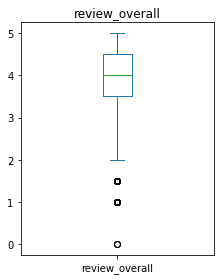

In [319]:
plt.subplot(122) 
new_data['review_overall'].plot.box(title= 'review_overall') 

plt.tight_layout()
plt.show()

The IQR for the overall review feature is between 3.5-4.5.

Function for top "n" frequency word

In [336]:
def get_top_words(column, top_n_words, ngram):
    
    vec = CountVectorizer(ngram_range= ngram, stop_words='english')
    
    bag_of_words = vec.fit_transform(column)
    
    sum_words = bag_of_words.sum(axis=0)
    
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    
    return words_freq[:top_n_words]

In [339]:
# lst_word = get_top_words(new_data['review_overall'].astype(str), 20, (2,2))
# df_words = pd.DataFrame(lst_word, columns=['Word', 'Count'])
# plt.figure(figsize=(7,6))
# sns.barplot(data=df_words, x='Count', y='Word')
# plt.title('Word Couple Frequency for User Review')

**Question 1 -	Rank top 3 Breweries which produce the strongest beers?**

Based on the alcohol volume of a beer (i.e. 'beer_ABV'), we can determine how strong it is.We have beer_brewerId for finding the breweries which produce the strongest beer.

In [320]:
df_top_abv = new_data.groupby('beer_brewerId')['beer_ABV'].mean()
df_top_abv = pd.DataFrame(data=df_top_abv).sort_values(by=['beer_ABV'],ascending=False).reset_index()
df_top_abv.head(3)

,beer_brewerId,beer_ABV
0,6513,19.228824
1,736,13.750000
2,24215,12.466667


The top 3 breweries which produce the strongest beer is listed below based on brewery ids.
- 6513
- 736
- 24215

***Question 2-	Which year did beers enjoy the highest ratings? ***

Use the overall rating we can find which year it got highest rating

In [321]:
df_good_year = new_data.groupby('year')[['review_overall']].mean().sort_values('review_overall',ascending = False).reset_index()
df_good_year

,year,review_overall
0,2000,4.233333
1,1998,4.038462
2,1999,4.026316
3,2001,3.958942
4,2010,3.868817
5,2009,3.868126
6,2005,3.842931
7,2008,3.839420
8,2012,3.838135
9,2011,3.832651


Beers enjoyed the highest ratings in the year 2000.

**Question 3- Based on the user’s ratings which factors are important among taste, aroma, appearance, and palette?**

Based on over all rating which factor's are highly correlated. This can be tested with heat map to find the correlated features. 

In [322]:
df_features = new_data[['review_taste','review_aroma','review_appearance', 'review_palette', 'review_overall']]
display(df_features)

,review_taste,review_aroma,review_appearance,review_palette,review_overall
0,1.5,1.5,2.5,2.0,1.5
1,3.0,3.0,3.0,2.5,3.0
2,3.0,3.0,3.0,2.5,3.0
3,2.5,3.0,3.5,3.0,3.0
4,4.0,4.5,4.0,4.5,4.0
...,...,...,...,...,...
528792,4.0,4.0,4.0,3.5,4.5
528793,3.5,3.5,4.0,3.5,3.5
528794,3.0,3.0,3.5,3.5,3.0
528795,3.0,3.0,3.0,3.0,3.5


In [323]:
corr_matrix= df_features.corr()
corr_matrix

,review_taste,review_aroma,review_appearance,review_palette,review_overall
review_taste,1.000000,0.723056,0.551939,0.601100,0.689629
review_aroma,0.723056,1.000000,0.531321,0.703602,0.780588
review_appearance,0.551939,0.531321,1.000000,0.544819,0.483247
review_palette,0.601100,0.703602,0.544819,1.000000,0.598400
review_overall,0.689629,0.780588,0.483247,0.598400,1.000000


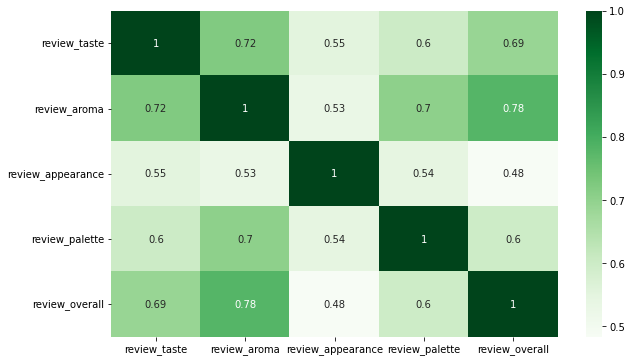

In [324]:
plt.figure(figsize=(10,6))
sns.heatmap(data=corr_matrix, annot=True,cmap="Greens")

 As per the above heat map the correlation factor with overall rating of the beers are listed below 
 - aroma ( 0.78)
 - taste (0.69)
 - pallete (0.60) 
 - appearance (0.48)

**Question 4-	If you were to recommend 3 beers to your friends based on this data which ones will you recommend?**

if you are going to recommned beer then it should have a good rating , good taste.

In [325]:
# recommend_taste = new_data[['beer_name','review_overall','review_taste']]
# recommend_taste = recommend_taste.groupby(['beer_name']).review_overall.agg('mean').sort_values(ascending = False).iloc[0:10]
# recommend_taste


recommend_taste = new_data.groupby('beer_name')['review_overall','review_taste','beer_ABV'].mean().reset_index().sort_values(by = ['review_overall','review_taste','beer_ABV'],ascending = False).head(10)
recommend_taste

,beer_name,review_overall,review_taste,beer_ABV
444,AleSmith Speedway Stout - Oak Aged,5.0,5.0,12.00
7655,Love Child Belgiweizen,5.0,5.0,10.40
4036,Edsten Triple-Wit,5.0,5.0,10.00
5920,Honey Badger,5.0,5.0,10.00
4035,Edsten Double Plus,5.0,5.0,9.50
9088,Old Gander Barley Wine,5.0,5.0,9.50
42,10th Anniversary Strong Belgian,5.0,5.0,9.25
7526,Lips Of Faith - Eric's Ale (Bourbon Barrel Aged),5.0,5.0,9.00
10481,Rogue Black Brutal,5.0,5.0,9.00
338,Ackerman's Imperial Double Stout (Winterfest Replicale 2011),5.0,5.0,8.00


The top 3 beers which can be considered for recommendation based on the overall ratings ,test and the alcohol volume is listed below
- AleSmith Speedway Stout - Oak Aged	
- Love Child Belgiweizen
- Edsten Triple-Wit	/ Honey Badger

***Question 5-	Which Beer style seems to be the favorite based on reviews written by users? ***

Let's check the user's review comment , based on review comment find out which one is most favoured beer style amoung consumer's. Find the most common beer styles

In [326]:
display(new_data['beer_style'].value_counts())
df_beerstyle = new_data.loc[:,['beer_style','review_text','review_overall']].sort_values(by='beer_style')
#df_beerstyle = df_beerstyle.iloc[0:100000,:].groupby('beer_style')['review_text'].count().nlargest(10)

American IPA                        42251
American Double / Imperial IPA      25819
American Double / Imperial Stout    23212
American Pale Ale (APA)             19079
American Amber / Red Ale            17749
                                    ...  
Kvass                                  97
American Dark Wheat Ale                90
Gose                                   85
Happoshu                               55
Faro                                   53
Name: beer_style, Length: 104, dtype: int64

What is the unique over all review in the data set. We may filterout lowest review rating which will not be useful to calualte most postive comments.

In [327]:
display(df_beerstyle.review_overall.unique())

array([3.5, 4. , 4.5, 5. , 3. , 2.5, 2. , 1. , 1.5, 0. ])

let's filter over all rating value >=3.5

In [329]:
df_beerstyle_new = df_beerstyle[df_beerstyle['review_overall']>=3.5][['beer_style','review_text']]

In [330]:
df_beerstyle_new.iloc[0:100000,:].groupby('beer_style')['review_text'].count().nlargest(10)

beer_style
American Double / Imperial IPA      22899
American Double / Imperial Stout    21194
American Amber / Red Ale            15047
American IPA                        10409
American Barleywine                  8812
American Brown Ale                   5548
American Adjunct Lager               4071
Altbier                              3019
American Black Ale                   2679
American Blonde Ale                  2660
Name: review_text, dtype: int64

In [331]:
display(df_beerstyle_new)

,beer_style,review_text
234062,Altbier,"Presentation: 12 oz longneck, date code printed on the back. Appearance: pours amber colored with a tan head, good retention. Smell: Malty, just a hint of the sulphur like aroma that I associate with pilsners usually. Taste: Malty with a bit of an odd aftertaste, it is a bit like the cooked vegetable taste you sometimes find, but not nearly as unpleasant. Overall impression: Pretty drinkable, a bit different than some of the other amber type beers you see more of. I wouldn't go too far out of my way for it, though."
443649,Altbier,"This beer pours a deep brown color. The head is one inch in height, and recedes slowly into a firm cap of lacing. The aroma is of camalized malt, toffee, with hints of herbal hops. The taste has the malty tones of the aroma with the addition of a firm bitterness that lingers on the tongue. The mouthfeel is full bodied with a velvety texture and nicely low carbonation. Overall, this is a fine beer that makes me wish there were more doppelsticke altbiers out there."
443650,Altbier,"10 oz pour at Memphis Tap Room, Fishington, Philly. Rick blackish-brown brew, opaque, tan head, spotty lacing. Aroma is full of raisins, malt, deep dark fruit, very winey and complex. Creamy mouthfeel. The flavor is outstanding, surprising for an alt in its rich fruitiness. Recalls a great Belgian quad in the multilayered malty and fruity complexity. Wonderful to savor and sad when its gone--hence wonderfully drinakble. Must try this again."
443651,Altbier,"Had on cask at the Ginger Man. Served in 12 oz. snifter. Was extremely excited to see this on cask after hearing about how different it is than on tap. Deep brown in color and quite cloudy in appearance. Head settled somewhat quickly, but some did retain and the lacing was noticeable. The first thing you notice with this one is the malt. Just smells like thick and tasty malt. Loads of caramel. Little bit of dark fruit in the back, but very hidden. Not surprisingly, the taste is very malty and excellent. Sweet, but not too much so. The dark fruit flavors are there, and a very nice balance to the big malt flavor. The alcohol is not hidden particularly well considering it is only around 8%. Doesn't work against the beer but it is definitely noticeable the whole time. Nice and slightly viscous on the tongue. Very pleasant overall and an excellent beer."
443652,Altbier,"A - Pours a medium brown color with a little clarity. The lighters hint of red shows in the light. Looks thick at first glance. Head is only able to get to half inch before settling to a thin cap. Retention and lacing both look good. S - Very malty. Seem to be getting several aromas from this beer. Bread (toasty and crusty), burnt caramel, and raisin are all heated ever so slightly by the alcohol. Pretty impressive overall. T - Starts out with some toasted bread and some sugary caramel flavors. Alcohol is warm and works well with the malty goodness. Dark fruit is present but pretty mild. I'm getting raisin and maybe some plum as well. At this point the unexpected happens. Alcohol flavor goes crazy and is just a kick in the teeth toward the end. Just enough though. M - Medium bodied with a light carbonation level. Finish is mostly sweet with some alcohol that lingers. Very creamy. D - Drinkability is good. Alcohol is a bit much overall and that does hinder this category a tad. The big malty flavors really work well with the finished product. At times, the alcohol also seems to fade a little and let this beer shine. I can see having another one of these in a session but that would be about it. Glad I got the chance to try this one out."
...,...,...
244595,Witbier,"This is the light blue label ""Belgian Wit"" I am putting that up front because I am wondering if I am drinking a different beer then everyone else? This is bland. Sure it has a nice colour to it, dusty light amber. Nose is OK, typical of a wit. This is one of these unoffensive beers with no character or outstand

In [332]:
df_beerstyle_new.reset_index(drop=True)

,beer_style,review_text
0,Altbier,"Presentation: 12 oz longneck, date code printed on the back. Appearance: pours amber colored with a tan head, good retention. Smell: Malty, just a hint of the sulphur like aroma that I associate with pilsners usually. Taste: Malty with a bit of an odd aftertaste, it is a bit like the cooked vegetable taste you sometimes find, but not nearly as unpleasant. Overall impression: Pretty drinkable, a bit different than some of the other amber type beers you see more of. I wouldn't go too far out of my way for it, though."
1,Altbier,"This beer pours a deep brown color. The head is one inch in height, and recedes slowly into a firm cap of lacing. The aroma is of camalized malt, toffee, with hints of herbal hops. The taste has the malty tones of the aroma with the addition of a firm bitterness that lingers on the tongue. The mouthfeel is full bodied with a velvety texture and nicely low carbonation. Overall, this is a fine beer that makes me wish there were more doppelsticke altbiers out there."
2,Altbier,"10 oz pour at Memphis Tap Room, Fishington, Philly. Rick blackish-brown brew, opaque, tan head, spotty lacing. Aroma is full of raisins, malt, deep dark fruit, very winey and complex. Creamy mouthfeel. The flavor is outstanding, surprising for an alt in its rich fruitiness. Recalls a great Belgian quad in the multilayered malty and fruity complexity. Wonderful to savor and sad when its gone--hence wonderfully drinakble. Must try this again."
3,Altbier,"Had on cask at the Ginger Man. Served in 12 oz. snifter. Was extremely excited to see this on cask after hearing about how different it is than on tap. Deep brown in color and quite cloudy in appearance. Head settled somewhat quickly, but some did retain and the lacing was noticeable. The first thing you notice with this one is the malt. Just smells like thick and tasty malt. Loads of caramel. Little bit of dark fruit in the back, but very hidden. Not surprisingly, the taste is very malty and excellent. Sweet, but not too much so. The dark fruit flavors are there, and a very nice balance to the big malt flavor. The alcohol is not hidden particularly well considering it is only around 8%. Doesn't work against the beer but it is definitely noticeable the whole time. Nice and slightly viscous on the tongue. Very pleasant overall and an excellent beer."
4,Altbier,"A - Pours a medium brown color with a little clarity. The lighters hint of red shows in the light. Looks thick at first glance. Head is only able to get to half inch before settling to a thin cap. Retention and lacing both look good. S - Very malty. Seem to be getting several aromas from this beer. Bread (toasty and crusty), burnt caramel, and raisin are all heated ever so slightly by the alcohol. Pretty impressive overall. T - Starts out with some toasted bread and some sugary caramel flavors. Alcohol is warm and works well with the malty goodness. Dark fruit is present but pretty mild. I'm getting raisin and maybe some plum as well. At this point the unexpected happens. Alcohol flavor goes crazy and is just a kick in the teeth toward the end. Just enough though. M - Medium bodied with a light carbonation level. Finish is mostly sweet with some alcohol that lingers. Very creamy. D - Drinkability is good. Alcohol is a bit much overall and that does hinder this category a tad. The big malty flavors really work well with the finished product. At times, the alcohol also seems to fade a little and let this beer shine. I can see having another one of these in a session but that would be about it. Glad I got the chance to try this one out."
...,...,...
424056,Witbier,"This is the light blue label ""Belgian Wit"" I am putting that up front because I am wondering if I am drinking a different beer then everyone else? This is bland. Sure it has a nice colour to it, dusty light amber. Nose is OK, typical of a wit. This is one of these unoffensive beers with no character or outstanding flavours. Bland, bori

In [67]:
display(df_beerstyle_new.head())

,beer_style,review_text
204044,Altbier,From a 12 oz. long neck brown bottle with a bl...
331600,Altbier,"A: Clear gold color, big frothy head. Nice lac..."
331598,Altbier,Nice pour with a deep straw color and foamy ca...
331347,Altbier,Sampled July 2007 at Nimbus Sits in my pint gl...
331346,Altbier,Had this on tap at the brewery yesterday. IIRC...


Let's do some text pre-processing 

In [341]:
# def preprocess_text(text):
#     processed_text = text
#     processed_text.replace('[^\w\s\d]', '')
#     processed_text.lower().split()       
#     processed_text = " ".join(word for word in processed_text.split() if word not in stop_words)
#     # processed_text = " ".join(word for word in processed_text.split() if word not in custom_stopwords)
#     processed_text = " ".join(Word(word).lemmatize() for word in processed_text.split())
#     return(processed_text)

# df_beerstyle_new['review_text_cleaned'] = df_beerstyle_new['review_text'].apply(lambda x: preprocess_text(x))
# df_beerstyle_new.head()

def tokens(words):
    words = re.sub("[^a-zA-Z]"," ", words)
    words = re.sub(r"won't", "will not", words)
    words = re.sub(r"can\'t", "can not", words)

    words = re.sub(r"n\'t", " not", words)
    words = re.sub(r"\'re", " are", words)
    words = re.sub(r"\'s", " is", words)
    words = re.sub(r"\'d", " would", words)
    words = re.sub(r"\'ll", " will", words)
    words = re.sub(r"\'t", " not", words)
    words = re.sub(r"\'ve", " have", words)
    words = re.sub(r"\'m", " am", words)
    text = words.lower().split()                   
    return " ".join(text)

def stopwords(review):
    text = [word.lower() for word in review.split() if word.lower() not in stop_words ]
    return " ".join(text)

def numbers(text):
    text_data = []
    for word in text.split():
        if not re.search('\d', word):
            text_data.append(word)
    return ' '.join(text_data)     


def lemma(text):
    lem_text = [lem.lemmatize(word) for word in text.split()]
    return " ".join(lem_text)

def decode_text(phrase):
    # text_data = []
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    
    # text_data.append(phrase)
    return phrase

In [334]:
df_beerstyle_new['review_text_cleaned'] = df_beerstyle_new['review_text'].apply(tokens)
df_beerstyle_new.head()

,beer_style,review_text,review_text_cleaned
234062,Altbier,"Presentation: 12 oz longneck, date code printed on the back. Appearance: pours amber colored with a tan head, good retention. Smell: Malty, just a hint of the sulphur like aroma that I associate with pilsners usually. Taste: Malty with a bit of an odd aftertaste, it is a bit like the cooked vegetable taste you sometimes find, but not nearly as unpleasant. Overall impression: Pretty drinkable, a bit different than some of the other amber type beers you see more of. I wouldn't go too far out of my way for it, though.",presentation oz longneck date code printed on the back appearance pours amber colored with a tan head good retention smell malty just a hint of the sulphur like aroma that i associate with pilsners usually taste malty with a bit of an odd aftertaste it is a bit like the cooked vegetable taste you sometimes find but not nearly as unpleasant overall impression pretty drinkable a bit different than some of the other amber type beers you see more of i wouldn t go too far out of my way for it though
443649,Altbier,"This beer pours a deep brown color. The head is one inch in height, and recedes slowly into a firm cap of lacing. The aroma is of camalized malt, toffee, with hints of herbal hops. The taste has the malty tones of the aroma with the addition of a firm bitterness that lingers on the tongue. The mouthfeel is full bodied with a velvety texture and nicely low carbonation. Overall, this is a fine beer that makes me wish there were more doppelsticke altbiers out there.",this beer pours a deep brown color the head is one inch in height and recedes slowly into a firm cap of lacing the aroma is of camalized malt toffee with hints of herbal hops the taste has the malty tones of the aroma with the addition of a firm bitterness that lingers on the tongue the mouthfeel is full bodied with a velvety texture and nicely low carbonation overall this is a fine beer that makes me wish there were more doppelsticke altbiers out there
443650,Altbier,"10 oz pour at Memphis Tap Room, Fishington, Philly. Rick blackish-brown brew, opaque, tan head, spotty lacing. Aroma is full of raisins, malt, deep dark fruit, very winey and complex. Creamy mouthfeel. The flavor is outstanding, surprising for an alt in its rich fruitiness. Recalls a great Belgian quad in the multilayered malty and fruity complexity. Wonderful to savor and sad when its gone--hence wonderfully drinakble. Must try this again.",oz pour at memphis tap room fishington philly rick blackish brown brew opaque tan head spotty lacing aroma is full of raisins malt deep dark fruit very winey and complex creamy mouthfeel the flavor is outstanding surprising for an alt in its rich fruitiness recalls a great belgian quad in the multilayered malty and fruity complexity wonderful to savor and sad when its gone hence wonderfully drinakble must try this again
443651,Altbier,"Had on cask at the Ginger Man. Served in 12 oz. snifter. Was extremely excited to see this on cask after hearing about how different it is than on tap. Deep brown in color and quite cloudy in appearance. Head settled somewhat quickly, but some did retain and the lacing was noticeable. The first thing you notice with this one is the malt. Just smells like thick and tasty malt. Loads of caramel. Little bit of dark fruit in the back, but very hidden. Not surprisingly, the taste is very malty and excellent. Sweet, but not too much so. The dark fruit flavors are there, and a very nice balance to the big malt flavor. The alcohol is not hidden particularly well considering it is only around 8%. Doesn't work against the beer but it is definitely noticeable the whole time. Nice and slightly viscous on the tongue. Very pleasant overall and an excellent beer.",had on cask at the ginger man served in oz snifter was extremely excited to see this on cask after hearing about how different it is than on tap deep brown in color and quite cloudy in appearance head settled so

In [342]:
df_beerstyle_new['review_text_cleaned'] = df_beerstyle_new['review_text_cleaned'].apply(stopwords)
df_beerstyle_new.head()

,beer_style,review_text,review_text_cleaned
234062,Altbier,"Presentation: 12 oz longneck, date code printed on the back. Appearance: pours amber colored with a tan head, good retention. Smell: Malty, just a hint of the sulphur like aroma that I associate with pilsners usually. Taste: Malty with a bit of an odd aftertaste, it is a bit like the cooked vegetable taste you sometimes find, but not nearly as unpleasant. Overall impression: Pretty drinkable, a bit different than some of the other amber type beers you see more of. I wouldn't go too far out of my way for it, though.",presentation oz longneck date code printed back appearance pours amber colored tan head good retention smell malty hint sulphur like aroma associate pilsners usually taste malty bit odd aftertaste bit like cooked vegetable taste sometimes find nearly unpleasant overall impression pretty drinkable bit different amber type beers see go far way though
443649,Altbier,"This beer pours a deep brown color. The head is one inch in height, and recedes slowly into a firm cap of lacing. The aroma is of camalized malt, toffee, with hints of herbal hops. The taste has the malty tones of the aroma with the addition of a firm bitterness that lingers on the tongue. The mouthfeel is full bodied with a velvety texture and nicely low carbonation. Overall, this is a fine beer that makes me wish there were more doppelsticke altbiers out there.",beer pours deep brown color head one inch height recedes slowly firm cap lacing aroma camalized malt toffee hints herbal hops taste malty tones aroma addition firm bitterness lingers tongue mouthfeel full bodied velvety texture nicely low carbonation overall fine beer makes wish doppelsticke altbiers
443650,Altbier,"10 oz pour at Memphis Tap Room, Fishington, Philly. Rick blackish-brown brew, opaque, tan head, spotty lacing. Aroma is full of raisins, malt, deep dark fruit, very winey and complex. Creamy mouthfeel. The flavor is outstanding, surprising for an alt in its rich fruitiness. Recalls a great Belgian quad in the multilayered malty and fruity complexity. Wonderful to savor and sad when its gone--hence wonderfully drinakble. Must try this again.",oz pour memphis tap room fishington philly rick blackish brown brew opaque tan head spotty lacing aroma full raisins malt deep dark fruit winey complex creamy mouthfeel flavor outstanding surprising alt rich fruitiness recalls great belgian quad multilayered malty fruity complexity wonderful savor sad gone hence wonderfully drinakble must try
443651,Altbier,"Had on cask at the Ginger Man. Served in 12 oz. snifter. Was extremely excited to see this on cask after hearing about how different it is than on tap. Deep brown in color and quite cloudy in appearance. Head settled somewhat quickly, but some did retain and the lacing was noticeable. The first thing you notice with this one is the malt. Just smells like thick and tasty malt. Loads of caramel. Little bit of dark fruit in the back, but very hidden. Not surprisingly, the taste is very malty and excellent. Sweet, but not too much so. The dark fruit flavors are there, and a very nice balance to the big malt flavor. The alcohol is not hidden particularly well considering it is only around 8%. Doesn't work against the beer but it is definitely noticeable the whole time. Nice and slightly viscous on the tongue. Very pleasant overall and an excellent beer.",cask ginger man served oz snifter extremely excited see cask hearing different tap deep brown color quite cloudy appearance head settled somewhat quickly retain lacing noticeable first thing notice one malt smells like thick tasty malt loads caramel little bit dark fruit back hidden surprisingly taste malty excellent sweet much dark fruit flavors nice balance big malt flavor alcohol hidden particularly well considering around work beer definitely noticeable whole time nice slightly viscous tongue pleasant overall excellent beer
443652,Altbier,"A - Pours a medium brown color with a little 

In [343]:
df_beerstyle_new['review_text_cleaned'] = df_beerstyle_new['review_text_cleaned'].apply(numbers)
df_beerstyle_new.head()

,beer_style,review_text,review_text_cleaned
234062,Altbier,"Presentation: 12 oz longneck, date code printed on the back. Appearance: pours amber colored with a tan head, good retention. Smell: Malty, just a hint of the sulphur like aroma that I associate with pilsners usually. Taste: Malty with a bit of an odd aftertaste, it is a bit like the cooked vegetable taste you sometimes find, but not nearly as unpleasant. Overall impression: Pretty drinkable, a bit different than some of the other amber type beers you see more of. I wouldn't go too far out of my way for it, though.",presentation oz longneck date code printed back appearance pours amber colored tan head good retention smell malty hint sulphur like aroma associate pilsners usually taste malty bit odd aftertaste bit like cooked vegetable taste sometimes find nearly unpleasant overall impression pretty drinkable bit different amber type beers see go far way though
443649,Altbier,"This beer pours a deep brown color. The head is one inch in height, and recedes slowly into a firm cap of lacing. The aroma is of camalized malt, toffee, with hints of herbal hops. The taste has the malty tones of the aroma with the addition of a firm bitterness that lingers on the tongue. The mouthfeel is full bodied with a velvety texture and nicely low carbonation. Overall, this is a fine beer that makes me wish there were more doppelsticke altbiers out there.",beer pours deep brown color head one inch height recedes slowly firm cap lacing aroma camalized malt toffee hints herbal hops taste malty tones aroma addition firm bitterness lingers tongue mouthfeel full bodied velvety texture nicely low carbonation overall fine beer makes wish doppelsticke altbiers
443650,Altbier,"10 oz pour at Memphis Tap Room, Fishington, Philly. Rick blackish-brown brew, opaque, tan head, spotty lacing. Aroma is full of raisins, malt, deep dark fruit, very winey and complex. Creamy mouthfeel. The flavor is outstanding, surprising for an alt in its rich fruitiness. Recalls a great Belgian quad in the multilayered malty and fruity complexity. Wonderful to savor and sad when its gone--hence wonderfully drinakble. Must try this again.",oz pour memphis tap room fishington philly rick blackish brown brew opaque tan head spotty lacing aroma full raisins malt deep dark fruit winey complex creamy mouthfeel flavor outstanding surprising alt rich fruitiness recalls great belgian quad multilayered malty fruity complexity wonderful savor sad gone hence wonderfully drinakble must try
443651,Altbier,"Had on cask at the Ginger Man. Served in 12 oz. snifter. Was extremely excited to see this on cask after hearing about how different it is than on tap. Deep brown in color and quite cloudy in appearance. Head settled somewhat quickly, but some did retain and the lacing was noticeable. The first thing you notice with this one is the malt. Just smells like thick and tasty malt. Loads of caramel. Little bit of dark fruit in the back, but very hidden. Not surprisingly, the taste is very malty and excellent. Sweet, but not too much so. The dark fruit flavors are there, and a very nice balance to the big malt flavor. The alcohol is not hidden particularly well considering it is only around 8%. Doesn't work against the beer but it is definitely noticeable the whole time. Nice and slightly viscous on the tongue. Very pleasant overall and an excellent beer.",cask ginger man served oz snifter extremely excited see cask hearing different tap deep brown color quite cloudy appearance head settled somewhat quickly retain lacing noticeable first thing notice one malt smells like thick tasty malt loads caramel little bit dark fruit back hidden surprisingly taste malty excellent sweet much dark fruit flavors nice balance big malt flavor alcohol hidden particularly well considering around work beer definitely noticeable whole time nice slightly viscous tongue pleasant overall excellent beer
443652,Altbier,"A - Pours a medium brown color with a little 

In [344]:
df_beerstyle_new['review_text_cleaned'] = df_beerstyle_new['review_text_cleaned'].apply(lemma)
df_beerstyle_new.head()

,beer_style,review_text,review_text_cleaned
234062,Altbier,"Presentation: 12 oz longneck, date code printed on the back. Appearance: pours amber colored with a tan head, good retention. Smell: Malty, just a hint of the sulphur like aroma that I associate with pilsners usually. Taste: Malty with a bit of an odd aftertaste, it is a bit like the cooked vegetable taste you sometimes find, but not nearly as unpleasant. Overall impression: Pretty drinkable, a bit different than some of the other amber type beers you see more of. I wouldn't go too far out of my way for it, though.",presentation oz longneck date code printed back appearance pours amber colored tan head good retention smell malty hint sulphur like aroma associate pilsner usually taste malty bit odd aftertaste bit like cooked vegetable taste sometimes find nearly unpleasant overall impression pretty drinkable bit different amber type beer see go far way though
443649,Altbier,"This beer pours a deep brown color. The head is one inch in height, and recedes slowly into a firm cap of lacing. The aroma is of camalized malt, toffee, with hints of herbal hops. The taste has the malty tones of the aroma with the addition of a firm bitterness that lingers on the tongue. The mouthfeel is full bodied with a velvety texture and nicely low carbonation. Overall, this is a fine beer that makes me wish there were more doppelsticke altbiers out there.",beer pours deep brown color head one inch height recedes slowly firm cap lacing aroma camalized malt toffee hint herbal hop taste malty tone aroma addition firm bitterness lingers tongue mouthfeel full bodied velvety texture nicely low carbonation overall fine beer make wish doppelsticke altbiers
443650,Altbier,"10 oz pour at Memphis Tap Room, Fishington, Philly. Rick blackish-brown brew, opaque, tan head, spotty lacing. Aroma is full of raisins, malt, deep dark fruit, very winey and complex. Creamy mouthfeel. The flavor is outstanding, surprising for an alt in its rich fruitiness. Recalls a great Belgian quad in the multilayered malty and fruity complexity. Wonderful to savor and sad when its gone--hence wonderfully drinakble. Must try this again.",oz pour memphis tap room fishington philly rick blackish brown brew opaque tan head spotty lacing aroma full raisin malt deep dark fruit winey complex creamy mouthfeel flavor outstanding surprising alt rich fruitiness recall great belgian quad multilayered malty fruity complexity wonderful savor sad gone hence wonderfully drinakble must try
443651,Altbier,"Had on cask at the Ginger Man. Served in 12 oz. snifter. Was extremely excited to see this on cask after hearing about how different it is than on tap. Deep brown in color and quite cloudy in appearance. Head settled somewhat quickly, but some did retain and the lacing was noticeable. The first thing you notice with this one is the malt. Just smells like thick and tasty malt. Loads of caramel. Little bit of dark fruit in the back, but very hidden. Not surprisingly, the taste is very malty and excellent. Sweet, but not too much so. The dark fruit flavors are there, and a very nice balance to the big malt flavor. The alcohol is not hidden particularly well considering it is only around 8%. Doesn't work against the beer but it is definitely noticeable the whole time. Nice and slightly viscous on the tongue. Very pleasant overall and an excellent beer.",cask ginger man served oz snifter extremely excited see cask hearing different tap deep brown color quite cloudy appearance head settled somewhat quickly retain lacing noticeable first thing notice one malt smell like thick tasty malt load caramel little bit dark fruit back hidden surprisingly taste malty excellent sweet much dark fruit flavor nice balance big malt flavor alcohol hidden particularly well considering around work beer definitely noticeable whole time nice slightly viscous tongue pleasant overall excellent beer
443652,Altbier,"A - Pours a medium brown color with a little clarity. Th

In [345]:
display(df_beerstyle_new[df_beerstyle_new['review_text']=="'re"])


,beer_style,review_text,review_text_cleaned


check some top frequnecy word with filtered over all review rating >=3.5

Text(0.5, 1.0, 'Word Couple Frequency for User Review')

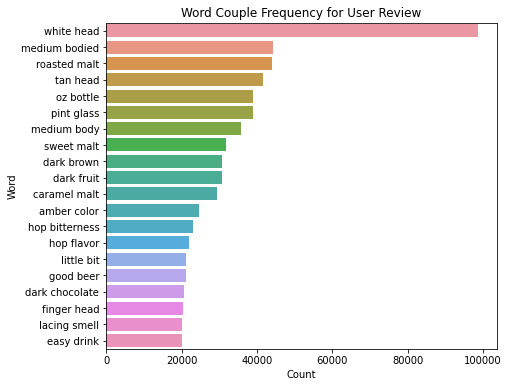

In [348]:
df_freq_word = df_beerstyle_new['review_text_cleaned'].astype(str)

lst_word = get_top_words(df_freq_word, 20, (2,2))
df_words = pd.DataFrame(lst_word, columns=['Word', 'Count'])
plt.figure(figsize=(7,6))
sns.barplot(data=df_words, x='Count', y='Word')
plt.title('Word Couple Frequency for User Review')

In [349]:
# df_freq_word.head(1)

In [350]:
df_beerstyle_new['polarity'] = df_beerstyle_new['review_text_cleaned'].apply(lambda x: TextBlob(x).sentiment[0])
df_beerstyle_new['subjectivity'] = df_beerstyle_new['review_text_cleaned'].apply(lambda x: TextBlob(x).sentiment[1])
df_beerstyle_new.head()

,beer_style,review_text,review_text_cleaned,polarity,subjectivity
234062,Altbier,"Presentation: 12 oz longneck, date code printed on the back. Appearance: pours amber colored with a tan head, good retention. Smell: Malty, just a hint of the sulphur like aroma that I associate with pilsners usually. Taste: Malty with a bit of an odd aftertaste, it is a bit like the cooked vegetable taste you sometimes find, but not nearly as unpleasant. Overall impression: Pretty drinkable, a bit different than some of the other amber type beers you see more of. I wouldn't go too far out of my way for it, though.",presentation oz longneck date code printed back appearance pours amber colored tan head good retention smell malty hint sulphur like aroma associate pilsner usually taste malty bit odd aftertaste bit like cooked vegetable taste sometimes find nearly unpleasant overall impression pretty drinkable bit different amber type beer see go far way though,-0.001852,0.516667
443649,Altbier,"This beer pours a deep brown color. The head is one inch in height, and recedes slowly into a firm cap of lacing. The aroma is of camalized malt, toffee, with hints of herbal hops. The taste has the malty tones of the aroma with the addition of a firm bitterness that lingers on the tongue. The mouthfeel is full bodied with a velvety texture and nicely low carbonation. Overall, this is a fine beer that makes me wish there were more doppelsticke altbiers out there.",beer pours deep brown color head one inch height recedes slowly firm cap lacing aroma camalized malt toffee hint herbal hop taste malty tone aroma addition firm bitterness lingers tongue mouthfeel full bodied velvety texture nicely low carbonation overall fine beer make wish doppelsticke altbiers,0.052381,0.364286
443650,Altbier,"10 oz pour at Memphis Tap Room, Fishington, Philly. Rick blackish-brown brew, opaque, tan head, spotty lacing. Aroma is full of raisins, malt, deep dark fruit, very winey and complex. Creamy mouthfeel. The flavor is outstanding, surprising for an alt in its rich fruitiness. Recalls a great Belgian quad in the multilayered malty and fruity complexity. Wonderful to savor and sad when its gone--hence wonderfully drinakble. Must try this again.",oz pour memphis tap room fishington philly rick blackish brown brew opaque tan head spotty lacing aroma full raisin malt deep dark fruit winey complex creamy mouthfeel flavor outstanding surprising alt rich fruitiness recall great belgian quad multilayered malty fruity complexity wonderful savor sad gone hence wonderfully drinakble must try,0.343182,0.693182
443651,Altbier,"Had on cask at the Ginger Man. Served in 12 oz. snifter. Was extremely excited to see this on cask after hearing about how different it is than on tap. Deep brown in color and quite cloudy in appearance. Head settled somewhat quickly, but some did retain and the lacing was noticeable. The first thing you notice with this one is the malt. Just smells like thick and tasty malt. Loads of caramel. Little bit of dark fruit in the back, but very hidden. Not surprisingly, the taste is very malty and excellent. Sweet, but not too much so. The dark fruit flavors are there, and a very nice balance to the big malt flavor. The alcohol is not hidden particularly well considering it is only around 8%. Doesn't work against the beer but it is definitely noticeable the whole time. Nice and slightly viscous on the tongue. Very pleasant overall and an excellent beer.",cask ginger man served oz snifter extremely excited see cask hearing different tap deep brown color quite cloudy appearance head settled somewhat quickly retain lacing noticeable first thing notice one malt smell like thick tasty malt load caramel little bit dark fruit back hidden surprisingly taste malty excellent sweet much dark fruit flavor nice balance big malt flavor alcohol hidden particularly well considering around work beer definitely noticeable whole time nice slightly viscous tongue pleasant overall excellent 

Find mean, median , mode value of sentiment analysis for beer style

In [351]:
display(df_beerstyle_new[['beer_style','polarity','subjectivity']].groupby('beer_style').agg([np.mean, np.max, np.min, np.median]))

polarity                                \
                                mean      amax      amin    median   
beer_style                                                           
Altbier                     0.193522  0.737500 -0.185938  0.191255   
American Adjunct Lager      0.168797  0.766667 -0.387500  0.166288   
American Amber / Red Ale    0.210090  1.000000 -0.605000  0.206349   
American Amber / Red Lager  0.192715  1.000000 -0.700000  0.191667   
American Barleywine         0.185359  0.790000 -0.276190  0.182917   
...                              ...       ...       ...       ...   
Vienna Lager                0.252355  0.833333 -0.259375  0.250156   
Weizenbock                  0.198926  0.766667 -0.173611  0.198485   
Wheatwine                   0.178470  0.621429 -0.464286  0.175573   
Winter Warmer               0.191595  1.000000 -0.373214  0.189965   
Witbier                     0.204290  0.850000 -0.460000  0.201290   

                           subjectivity                                
                                   mean      amax      amin    median  
beer_style                                                             
Altbier                        0.536739  0.950000  0.000000  0.537500  
American Adjunct Lager         0.513846  0.916667  0.000000  0.513308  
American Amber / Red Ale       0.531072  1.000000  0.000000  0.530303  
American Amber / Red Lager     0.534095  1.000000  0.116667  0.533929  
American Barleywine            0.527065  0.891667  0.000000  0.526471  
...                                 ...       ...       ...       ...  
Vienna Lager                   0.551715  1.000000  0.000000  0.549048  
Weizenbock                     0.528241  0.861905  0.000000  0.528968  
Wheatwine                      0.530806  0.826984  0.243588  0.530000  
Winter Warmer                  0.536783  1.000000  0.000000  0.535306  
Witbier                        0.521948  1.000000  0.000000  0.521429  

[104 rows x 8 columns]

Let's check the avearage sentiment polarity

In [352]:
df_sentiment =df_beerstyle_new.groupby('beer_style')['polarity'].mean().reset_index().sort_values(by = ['polarity'],ascending = False)
display(df_sentiment.head())


,beer_style,polarity
99,Vienna Lager,0.252355
38,Dortmunder / Export Lager,0.248864
36,Czech Pilsener,0.227528
82,Märzen / Oktoberfest,0.219435
12,American IPA,0.218431


In [353]:
df_sentiment2=df_beerstyle_new.copy()

In [354]:
sianalyzer = SentimentIntensityAnalyzer()

In [355]:
df_sentiment2['polarity_score2'] = df_sentiment2['review_text_cleaned'].apply(lambda x: sianalyzer.polarity_scores(x)['compound'])

In [356]:
df_sentiment2.sort_values(by = ['polarity_score2'],ascending = False)[0:5]

beer_style  \
472823       English Barleywine   
86015              American IPA   
77599       American Barleywine   
101959  American Pale Ale (APA)   
292403     Märzen / Oktoberfest   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  

In [357]:
df_sentiment3=df_sentiment2.groupby('beer_style')['polarity_score2'].mean().reset_index().sort_values(by = ['polarity_score2'],ascending = False)
display(df_sentiment3.head())

,beer_style,polarity_score2
28,Bière de Champagne / Bière Brut,0.922195
101,Wheatwine,0.912700
86,Quadrupel (Quad),0.912139
38,Dortmunder / Export Lager,0.909195
32,Braggot,0.908727


In [141]:
#pd.set_option('display.max_colwidth',None)

In [358]:
df_sentiment2.loc[df_sentiment2['beer_style'] == 'Bière de Champagne / Bière Brut'].sort_values(by = ['polarity_score2'],ascending = True)[0:5]

,beer_style,review_text,review_text_cleaned,polarity,subjectivity,polarity_score2
295496,Bière de Champagne / Bière Brut,I tried this what they want to call a beer a couple of times. The first time I tried it there was a bad cork taste to it or something happened to the taste that it just wasn't right. I went back to the store and tried another bottle and this didn't the bad taste to it but it didn't live up to all the hype. It was a decent drinkable beer but nothing outstanding and not worth the $20 for a 750ml. It was probably one of the lightest Sam Adams beers that I've tried.,tried want call beer couple time first time tried bad cork taste something happened taste right went back store tried another bottle bad taste live hype decent drinkable beer nothing outstanding worth ml probably one lightest sam adam beer tried,0.026527,0.482672,-0.8906
295444,Bière de Champagne / Bière Brut,"A: Poured from a bottle to a flute glass. Had a golden yellow color and a slightly hazy consistency. There was a big, fizzy, fairly long-lasting head. Not much lacing. S: A sharp acidic smell, with traces of hops, malt and a vinous quality. T: This is a fairly acidic beer, and it threatens to dominate the flavor. There are also traces of citrus, hops, that vinous quality, and a maltiness in the finish. In some ways, the taste is just too unfocused. M: A well-carbonated beer with a surprisingly dry finish. Light-bodied. O: This is my first Biere de Champagne, so I don't really have a frame of reference. That being said, I found this beer to be very uneven in spots. I look forward to trying other examples of the style.",poured bottle flute glass golden yellow color slightly hazy consistency big fizzy fairly long lasting head much lacing sharp acidic smell trace hop malt vinous quality fairly acidic beer threatens dominate flavor also trace citrus hop vinous quality maltiness finish way taste unfocused well carbonated beer surprisingly dry finish light bodied first biere de champagne really frame reference said found beer uneven spot look forward trying example style,0.069444,0.390000,-0.0772
295654,Bière de Champagne / Bière Brut,"appearance: golden amberish with a huge head smell: not much, some nutty aromas. pilsner malt taste: apples, caramel, buttery, fruity. lots of flavors and way more malt backbone than expected. mouthfeel: medium bodied, more than expected. drinkability: serious hype and it was actually a decent beer and being way more complex than expected.",appearance golden amberish huge head smell much nutty aroma pilsner malt taste apple caramel buttery fruity lot flavor way malt backbone expected mouthfeel medium bodied expected drinkability serious hype actually decent beer way complex expected,0.014815,0.503704,0.2500
295735,Bière de Champagne / Bière Brut,"A - looks like an outrageous IPA. Sea foam like white head. Vey aggressive bubbles. S-pear, soapy, slightly pinelike. It was funky. T- weihenstephaner dominates the taste. Citrus and champagne in the beginning. Apple malt a-relatively smooth and fluffy, not overly carbonated. Slightly metallic D-heavily carbonated maybe rough on the stomach.",look like outrageous ipa sea foam like white head vey aggressive bubble pear soapy slightly pinelike funky weihenstephaner dominates taste citrus champagne beginning apple malt relatively smooth fluffy overly carbonated slightly metallic heavily carbonated maybe rough stomach,-0.179167,0.391667,0.3976
295753,Bière de Champagne / Bière Brut,"appearance - pours golden and clouded, enormous head smell - mostly funky spice taste - spice is front and center, has the Weihenstephan yeast flavor going on, alcohol is hidden mouthfeel - highly carbonated, medium body overall - definitely a different taste, not a style i'm very familiar with, not bad, not great",appearance pours golden clouded enormous head smell mostly funky spice taste spice front center weihenstephan yeast flavor going alcohol hidden mouthfeel highly carbonated medium body overall

In [360]:
# idx = [348953]
# df_sentiment2.iloc[idx].review_text_cleaned
# df_sentiment['polarity'].max()

0.2523552949229842

In [359]:
beer_list=['Bière de Champagne / Bière Brut','Vienna Lager']


display("*****TextBlob analysis************")
display(df_sentiment[df_sentiment['beer_style'].isin(beer_list)])
display("******NLTK SentimentIntensityAnalyzer******")
display(df_sentiment3[df_sentiment3['beer_style'].isin(beer_list)])



'*****TextBlob analysis************'

,beer_style,polarity
99,Vienna Lager,0.252355
28,Bière de Champagne / Bière Brut,0.188871


'******NLTK SentimentIntensityAnalyzer******'

,beer_style,polarity_score2
28,Bière de Champagne / Bière Brut,0.922195
99,Vienna Lager,0.886084


Used two different methods to find the Beer style seems to be the favorite based on reviews written by users. Calculate the average polarity score for each beer style
- Using textblob the most favourite beer style is **Vienna Lager**
- Using NLTK SentimentIntensityAnalyzer the most favourite beer style is **Bière de Champagne / Bière Brut**

**Question 6-	How does written review compare to overall review score for the beer styles?**

Let's compare over all review with review comments for each beer style

In [373]:
df_beerst_review = new_data.loc[:,['beer_style','review_overall','review_text']]

In [374]:
display(df_beerst_review.head())
display(df_beerst_review.shape)

,beer_style,review_overall,review_text
0,Hefeweizen,1.5,"A lot of foam. But a lot. In the smell some banana, and then lactic and tart. Not a good start. Quite dark orange in color, with a lively carbonation (now visible, under the foam). Again tending to lactic sourness. Same for the taste. With some yeast and banana."
1,English Strong Ale,3.0,"Dark red color, light beige foam, average. In the smell malt and caramel, not really light. Again malt and caramel in the taste, not bad in the end. Maybe a note of honey in teh back, and a light fruitiness. Average body. In the aftertaste a light bitterness, with the malt and red fruit. Nothing exceptional, but not bad, drinkable beer."
2,Foreign / Export Stout,3.0,"Almost totally black. Beige foam, quite compact, not bad. Light smell, just a bit of roast, and some hop. A bit too light. The taste is light oo, and drinkable, with some malt, roast, hints of coffee. Nothing exceptional, but after all drinkable and pleasant. Light to average body. In the aftertaste some dust, somr roast, hint of caramel, and a bit of bitterness. No defect, drinkable, not bad."
3,German Pilsener,3.0,"Golden yellow color. White, compact foam, quite creamy. Good appearance. Fresh smell, with good hop. Quite dry, with a good grassy note. Hay. Fresh and pleasant. More sweet in the mouth, with honey. The hop comes back in the end, and in the aftertaste. Not bad, but a bit too sweet for a pils. In the end some vanilla and camomile note. In the aftertaste, too. Though the hop, a bit too sweet. Honest."
4,American Double / Imperial IPA,4.0,"According to the website, the style for the Caldera Cauldron changes every year. The current release is a DIPA, which frankly is the only cauldron I'm familiar with (it was an IPA/DIPA the last time I ordered a cauldron at the horsebrass several years back). In any event... at the Horse Brass yesterday. The beer pours an orange copper color with good head retention and lacing. The nose is all hoppy IPA goodness, showcasing a huge aroma of dry citrus, pine and sandlewood. The flavor profile replicates the nose pretty closely in this West Coast all the way DIPA. This DIPA is not for the faint of heart and is a bit much even for a hophead like myslf. The finish is quite dry and hoppy, and there's barely enough sweet malt to balance and hold up the avalanche of hoppy bitterness in this beer. Mouthfeel is actually fairly light, with a long, persistentely bitter finish. Drinkability is good, with the alcohol barely noticeable in this well crafted beer. Still, this beer is so hugely hoppy/bitter, it's really hard for me to imagine ordering more than a single glass. Regardless, this is a very impressive beer from the folks at Caldera."


(510950, 3)

In [375]:
df_beerst_review=df_beerst_review.groupby(['beer_style','review_text'])[['review_overall']].sum().sort_values('review_overall',ascending = False).reset_index()

In [376]:
display(df_beerst_review)

,beer_style,review_text,review_overall
0,American IPA,#NAME?,56.5
1,Tripel,#NAME?,50.5
2,American Pale Ale (APA),#NAME?,45.0
3,Russian Imperial Stout,#NAME?,42.5
4,Belgian Strong Pale Ale,#NAME?,35.5
...,...,...,...
510567,American Amber / Red Ale,APPEARANCE: 12 ounce bottle with no date. Pours a hazy orange/copper color with a medium off-white head. AROMA: Light sour cherry and malt. FLAVOR: Harsh bitterness reminding me of aspirin. There are some grapefruit and malt flavors. MOUTHFEEL: Medium body with dry chalky feel. DRINKABILITY: I pour this beer down the drain after a few sips. Not sure if I had a bad batch but the bitterness I got was horrible. NOTES: BBCSD-0910-Patrick,1.0
510568,Fruit / Vegetable Beer,"It has long been my dream that one day, during my lifetime, aliens will land on the planet Earth, bringing to us great gifts of technology, culture and art. I continue to hope this will happen. And if it does, I also pray that whomever is the first to meet the aliens doesn't give them a bottle of Long Trail Blackbeary Wheat, or those fuckers will blow this goddam little dirtball up, and head on to greener pastures. Appearance: Pours BMC clear into my glass, a few lazy bubbles and a rather reluctant head. It froths up, but only for as long as it takes to convince you that it's serious, and then immediately runs off and takes a nap. Smell: If I may have an Oingo Boingo moment. When I was a lad, my mom used to take my sister and I to a restaurant at Northgate Mall on a semi-regular basis. With our meals (whether it was breakfast or lunch) we would always get a Slush Puppy. I don't know if you are familiar with a Slush Puppy, but it is essentially a cup filled with crushed ice then covered with a flavored syrup. The idea was that the syrup would melt this crushed ice and you'd have a nice, cold, fruity drink. However, if you were smart about it, you could drink the syrup quick as a mofo, and never have to deal with any of that goddam ice. These syrups came in all sorts of flavors like root beer, blueberry, watermelon, bubble gum, etc. Basically the same shit you get at the dentist when they are offering you flavors for your fluoride (peanut butter, man. You have GOT to go with the peanut butter.) Well, one of the flavors offered at the Slush Puppy Syrup Bar was blackberry. This beer smells just like that. Taste: I remember very clearly when Count Chocula, Franken Berry and Boo Berry cereals came out back in the 70s. As far as I was concerned, any cereal with monsters on it had to kick ass. And it did, when I was seven. This beer tastes like the milk you'd get if you let your Boo Berry sit long enough to extract some of that high fructose corn syrup goodness, except without the 'goodness' part. Gah! There it is again. Mouthfeel: I sure wish I had a Slush Puppy right about now... Drinkability: In the interest of maintaining intergalactic peace, I'm pouring this beer out.",1.0
510569,Irish Dry Stout,This beer presents with a heavy smoky roast aroma and creamy head promising a tasty built beer. Unfortunately and inexplicably it all goes down hill from there. The body is watery and the roasted lightly smoky flavor is the only evidence malt was used. No noticeable bitterness or spice is present. Very disappointing.,0.0
510570,American Pale Ale (APA),"This American pale ale has a spicy grassy hop aroma. The absent malt character and watery body give this beer a very tea-like quality. One of the least enjoyable, least flavorful beers in Utah which says something.",0.0


Filter out review text =#NAME

In [386]:
display(df_beerst_review.loc[df_beerst_review.review_text != '#NAME?'][['beer_style','review_overall']].head(6))

,beer_style,review_overall
15,American Adjunct Lager,16.5
23,Märzen / Oktoberfest,11.5
24,American Adjunct Lager,11.5
26,English Porter,11.5
30,Fruit / Vegetable Beer,10.0
31,American Double / Imperial Stout,10.0


The favourite beer style based on review is listed below .American Adjunct Lager is having two different review 16.5 and 11.5. So let's consider it as one
- American Adjunct Lager
- Märzen / Oktoberfes
- English Porter
- Fruit / Vegetable Beer 
- American Double / Imperial Stout	

review over all Vs beer style

In [435]:
display(df_beerst_review.head())
display(df_beerst_review.shape)

,beer_style,review_text,review_overall
0,American IPA,#NAME?,56.5
1,Tripel,#NAME?,50.5
2,American Pale Ale (APA),#NAME?,45.0
3,Russian Imperial Stout,#NAME?,42.5
4,Belgian Strong Pale Ale,#NAME?,35.5


(510572, 3)

In [436]:
df_beerst_reviewall = df_beerst_review.groupby('beer_style')[['review_overall']].mean().sort_values('review_overall', ascending = False).reset_index()
df_beerst_reviewall

,beer_style,review_overall
0,Gueuze,4.148631
1,Berliner Weissbier,4.119225
2,American Double / Imperial Stout,4.103349
3,Oatmeal Stout,4.097147
4,Eisbock,4.082474
...,...,...
99,Light Lager,2.924035
100,Happoshu,2.818182
101,Euro Strong Lager,2.818119
102,American Malt Liquor,2.730999


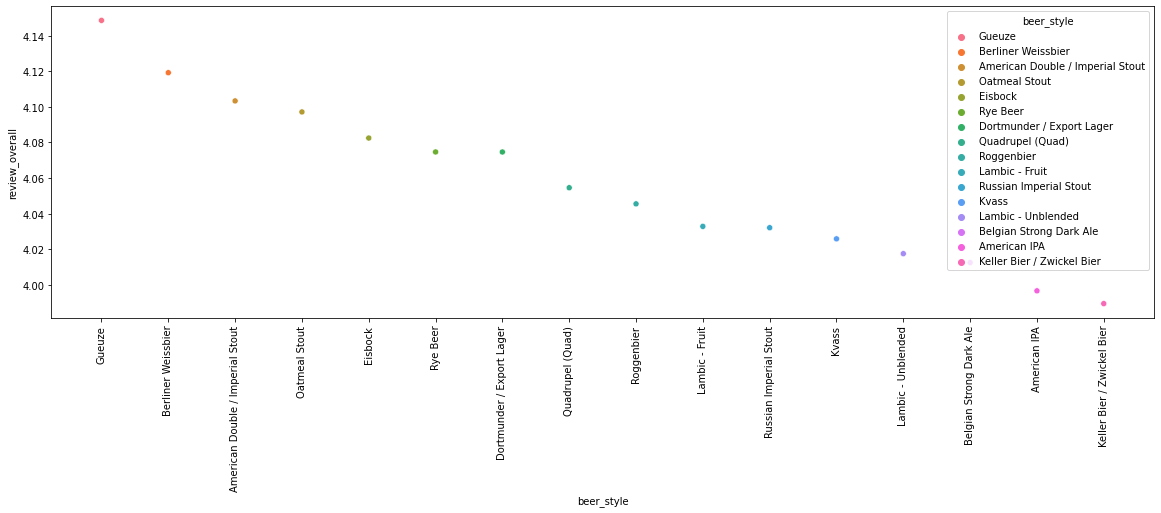

,beer_style,review_overall
0,Gueuze,4.148631
1,Berliner Weissbier,4.119225
2,American Double / Imperial Stout,4.103349
3,Oatmeal Stout,4.097147
4,Eisbock,4.082474
5,Rye Beer,4.074639
6,Dortmunder / Export Lager,4.074623
7,Quadrupel (Quad),4.054530
8,Roggenbier,4.045455
9,Lambic - Fruit,4.032769


In [448]:
plt.figure(figsize=(16,5))
plt.xticks(rotation=90)
plt.tight_layout()
plot_bs = df_beerst_reviewall.loc[:15]
sns.scatterplot(data = plot_bs, x = "beer_style", y = "review_overall",hue='beer_style')
plt.show()
display(plot_bs)

***Question 7-	How do find similar beer drinkers by using written reviews only?  *** 

Based on cosine similarity score on review comments we may find similar beer drinkers. 

In [387]:
beer_profile = new_data[['review_profileName','review_text']]

In [388]:
display(new_data.shape)

(510950, 14)

In [389]:
display(beer_profile.head())

,review_profileName,review_text
0,stcules,"A lot of foam. But a lot. In the smell some banana, and then lactic and tart. Not a good start. Quite dark orange in color, with a lively carbonation (now visible, under the foam). Again tending to lactic sourness. Same for the taste. With some yeast and banana."
1,stcules,"Dark red color, light beige foam, average. In the smell malt and caramel, not really light. Again malt and caramel in the taste, not bad in the end. Maybe a note of honey in teh back, and a light fruitiness. Average body. In the aftertaste a light bitterness, with the malt and red fruit. Nothing exceptional, but not bad, drinkable beer."
2,stcules,"Almost totally black. Beige foam, quite compact, not bad. Light smell, just a bit of roast, and some hop. A bit too light. The taste is light oo, and drinkable, with some malt, roast, hints of coffee. Nothing exceptional, but after all drinkable and pleasant. Light to average body. In the aftertaste some dust, somr roast, hint of caramel, and a bit of bitterness. No defect, drinkable, not bad."
3,stcules,"Golden yellow color. White, compact foam, quite creamy. Good appearance. Fresh smell, with good hop. Quite dry, with a good grassy note. Hay. Fresh and pleasant. More sweet in the mouth, with honey. The hop comes back in the end, and in the aftertaste. Not bad, but a bit too sweet for a pils. In the end some vanilla and camomile note. In the aftertaste, too. Though the hop, a bit too sweet. Honest."
4,johnmichaelsen,"According to the website, the style for the Caldera Cauldron changes every year. The current release is a DIPA, which frankly is the only cauldron I'm familiar with (it was an IPA/DIPA the last time I ordered a cauldron at the horsebrass several years back). In any event... at the Horse Brass yesterday. The beer pours an orange copper color with good head retention and lacing. The nose is all hoppy IPA goodness, showcasing a huge aroma of dry citrus, pine and sandlewood. The flavor profile replicates the nose pretty closely in this West Coast all the way DIPA. This DIPA is not for the faint of heart and is a bit much even for a hophead like myslf. The finish is quite dry and hoppy, and there's barely enough sweet malt to balance and hold up the avalanche of hoppy bitterness in this beer. Mouthfeel is actually fairly light, with a long, persistentely bitter finish. Drinkability is good, with the alcohol barely noticeable in this well crafted beer. Still, this beer is so hugely hoppy/bitter, it's really hard for me to imagine ordering more than a single glass. Regardless, this is a very impressive beer from the folks at Caldera."


In [390]:
display("the number of unique profiler:",len(beer_profile['review_profileName'].value_counts()))
display(beer_profile['review_profileName'].unique())


'the number of unique profiler:'

22594

array(['stcules', 'johnmichaelsen', 'oline73', ..., 'peterbcarr',
       'ladnewton', 'BleedBlueUSAF'], dtype=object)

- We have 22594 user profile in this data set.
- let's create a dataset with unique combination of user and corresponding user reviews

In [391]:
df_user_profile = beer_profile.groupby("review_profileName")["review_text"].apply(str)

In [392]:
display(df_user_profile.index[100])
display(beer_profile[beer_profile['review_profileName']==df_user_profile.index[100]])

'484dan'

,review_profileName,review_text
127260,484dan,at first glance this beer has a regular orange/brownish color to it... the smell has a high aroma of yeast... the taste is suprisingly smooth and refreshing... no aftertaste and not much carbonation either... the alcohol is hidden quit well... overall this is a good sipping beer... watch out for the abv. it'll sneek up on ya'
410331,484dan,"at first glance this beer has a reddish tint to it w/a nice thick head when poured... the smell is very piney, maybe a hint of citrus... the smell along w/the taste scream hoppy!! the mouthfeel is... well... ok... a little bit of an after taste and the alcohol is apparent... the beer is absolutely worth a try..."


In [393]:
display(df_user_profile.head(1))

review_profileName
0110x011    21803                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    

In [394]:
#abv_mode_df.to_frame().reset_index()
type(df_user_profile)

pandas.core.series.Series

In [395]:
df_user_profile_indx=df_user_profile.to_frame().reset_index()


In [396]:
df_user_profile_indx.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22594 entries, 0 to 22593
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   review_profileName  22594 non-null  object
 1   review_text         22594 non-null  object
dtypes: object(2)
memory usage: 353.2+ KB


In [397]:
display(df_user_profile_indx['review_profileName'].unique())

array(['0110x011', '03SVTCobra', '04101Brewer', ..., 'zymurgywhiz',
       'zythus', 'zyzygy'], dtype=object)

Prepared clean text

In [398]:
df_user_profile_indx['review_text'] = df_user_profile_indx['review_text'].str.replace('\n'," ")
df_user_profile_indx['review_text'] = df_user_profile_indx['review_text'].str.strip(" ")
df_user_profile_indx['review_text'] = df_user_profile_indx['review_text'].apply(tokens)
df_user_profile_indx['review_text'] = df_user_profile_indx['review_text'].apply(stopwords)
df_user_profile_indx['review_text'] = df_user_profile_indx['review_text'].apply(numbers)
df_user_profile_indx['review_text'] = df_user_profile_indx['review_text'].apply(lemma)

In [111]:
#df_user_profile_indx.to_csv("/content/drive/My Drive/Colab Notebooks/beer_analysis/user_profile.csv",encoding='utf-8', index=False)

In [399]:
display(df_user_profile_indx.head(1))

review_profileName  \
0           0110x011   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 

In [400]:
#df_user_profile_indx.to_csv("/content/drive/My Drive/Colab Notebooks/beer_analysis/user_profile.csv",encoding='utf-8', index=False)
#df_user_profile_indx =pd.read_csv("/content/drive/My Drive/Colab Notebooks/beer_analysis/user_profile.csv",encoding='utf-8')

In [401]:
display(df_user_profile_indx.head(1))
display(df_user_profile_indx.shape)

review_profileName  \
0           0110x011   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 

(22594, 2)

In [402]:
# df_user_indx = df_user_profile_indx.set_index('review_profileName')
df_user_indx = df_user_profile_indx.copy()

In [403]:
display(df_user_indx.head(1))
display(df_user_indx.shape)

review_profileName  \
0           0110x011   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 

(22594, 2)

take only 1st 200 sample records

In [404]:
tfidf_matrix_user_sample= df_user_indx[:200]
df_user_data = tfidf_matrix_user_sample.copy()

In [405]:
tfidf_matrix_user_sample.columns

Index(['review_profileName', 'review_text'], dtype='object')

createa a data set for index and user 

In [406]:
df_user_data['index1'] = df_user_data.index
df_user_data = df_user_data.reset_index(level=0)
df_user_data2 = df_user_data[['index1','review_profileName']]

this data set conatins combination of index and user name

In [407]:
df_user_data2

,index1,review_profileName
0,0,0110x011
1,1,03SVTCobra
2,2,04101Brewer
3,3,05Harley
4,4,0runkp0s
...,...,...
195,195,AITCTKD170
196,196,AJ99
197,197,AJDean
198,198,AJFitz


In [410]:
display(tfidf_matrix_user_sample.shape)
# display(tfidf_matrix_user_sample.head(5))
display(tfidf_matrix_user_sample.head(1))

(200, 2)

review_profileName  \
0           0110x011   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 

In [411]:
tf = TfidfVectorizer(analyzer='word', ngram_range=(1, 3), min_df=0, stop_words='english')
tfidf_matrix_user = tf.fit_transform(tfidf_matrix_user_sample['review_text'])

In [412]:
display((tfidf_matrix_user.shape))
display(tfidf_matrix_user)


(200, 142475)

<200x142475 sparse matrix of type '<class 'numpy.float64'>'
	with 196374 stored elements in Compressed Sparse Row format>

In [121]:
#pd. __version__ 

used memory based model for recommendation using cosine-similarity.

In [413]:
cos_similarities = cosine_similarity(tfidf_matrix_user,Y=None,dense_output=False)
cnum = (cos_similarities.toarray())


In [414]:
display(((cos_similarities[0][:1,:-19])))
type(cos_similarities)

<1x181 sparse matrix of type '<class 'numpy.float64'>'
	with 181 stored elements in Compressed Sparse Row format>

scipy.sparse.csr.csr_matrix

In [415]:
type(cos_similarities)

scipy.sparse.csr.csr_matrix

In [416]:
from scipy.sparse import csr_matrix

df_matrix = pd.DataFrame.sparse.from_spmatrix(tfidf_matrix_user)
df_matrix.dtypes




0         Sparse[float64, 0]
1         Sparse[float64, 0]
2         Sparse[float64, 0]
3         Sparse[float64, 0]
4         Sparse[float64, 0]
                 ...        
142470    Sparse[float64, 0]
142471    Sparse[float64, 0]
142472    Sparse[float64, 0]
142473    Sparse[float64, 0]
142474    Sparse[float64, 0]
Length: 142475, dtype: object

In [417]:
display(df_matrix.head())

,0,1,2,3,4,5,6,7,8,9,...,142465,142466,142467,142468,142469,142470,142471,142472,142473,142474
0,0.008982,0.008982,0.008982,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [418]:
display(cos_similarities.getcol(0))

<200x1 sparse matrix of type '<class 'numpy.float64'>'
	with 200 stored elements in Compressed Sparse Row format>

In [419]:
def get_user_recommendations(id):

    display("the user selected is {}".format(df_matrix.index[id]))
    a = cos_similarities.getcol(id)
    val = list(enumerate(a.data))
    b= dict(val)
    #display(b)
    c = sorted(b.items(),key=lambda x:x[1],reverse=True)[1:4]
    k = 1
    for idx in c:
       display("The {} Recommendation is {}".format(k,df_matrix.index[idx[0]]))
       k += 1
    return c 

In [420]:
# tfidf_matrix_user.index[0]

enetr the index value for recommendation in user_idx variable

In [421]:
user_idx=0
index_val= get_user_recommendations(user_idx)


'the user selected is 0'

'The 1 Recommendation is 108'

'The 2 Recommendation is 81'

'The 3 Recommendation is 8'

In [422]:
# type(index_val)
index_val

[(108, 0.2538159004711982),
 (81, 0.24830804447752983),
 (8, 0.24352877694281097)]

In [423]:
# index_val[0][0]
user_id=[]
for sublist in index_val:
    print(sublist[0])
    user_id.append(sublist[0])

108
81
8


In [424]:
user_id.append(user_idx)
display(user_id)

[108, 81, 8, 0]

In [425]:
user_id
display(tfidf_matrix_user_sample.iloc[user_id])




review_profileName  \
108           51mmz0rz   
81             321jeff   
8            100floods   
0             0110x011   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 

get the user name from index that we got from recommendation

In [426]:
user_list = df_user_data2[df_user_data2['index1'].isin(user_id)][['review_profileName']].drop_duplicates()

In [427]:
display(user_list)
user_list_val=user_list.values.flatten().tolist()
display(user_list_val)

,review_profileName
0,0110x011
8,100floods
81,321jeff
108,51mmz0rz


['0110x011', '100floods', '321jeff', '51mmz0rz']

In [428]:
test_user_recommend = new_data[new_data['review_profileName'].isin(user_list_val)][['beer_name','beer_style','review_overall','review_profileName']].drop_duplicates()


check the recommend data details like beer name , beer style , over all review and profile name (user name)

In [429]:
test_user_recommend

,beer_name,beer_style,review_overall,review_profileName
18093,Founders Cerise,Fruit / Vegetable Beer,2.5,321jeff
21803,Founders Breakfast Stout,American Double / Imperial Stout,4.5,0110x011
23336,Founders Breakfast Stout,American Double / Imperial Stout,4.5,321jeff
25715,Founders Nemesis 2010,American Barleywine,3.5,321jeff
29123,Founders Double Trouble,American Double / Imperial IPA,4.0,321jeff
...,...,...,...,...
496286,Captain Sig's Northwestern Ale,American Amber / Red Ale,3.0,100floods
506280,Shakespeare Oatmeal Stout,Oatmeal Stout,4.5,51mmz0rz
506937,Voodoo Doughnut Maple Bacon Ale,Smoked Beer,2.0,100floods
516404,Samuel Smith's Nut Brown Ale,English Brown Ale,4.5,51mmz0rz


In [430]:
display(test_user_recommend[test_user_recommend['review_profileName']=='0110x011'].beer_style.unique())

array(['American Double / Imperial Stout', 'American IPA', 'Old Ale',
       'Flanders Red Ale', 'Tripel', 'Saison / Farmhouse Ale', 'Witbier',
       'American Strong Ale', 'American Wild Ale', 'Belgian Dark Ale',
       'Russian Imperial Stout', 'American Amber / Red Ale',
       'American Double / Imperial Pilsner',
       'American Double / Imperial IPA', 'American Porter',
       'American Barleywine', 'Bière de Garde', 'Belgian Strong Dark Ale',
       'Fruit / Vegetable Beer', 'Lambic - Fruit'], dtype=object)

In [431]:
display(test_user_recommend.beer_style.unique())


array(['Fruit / Vegetable Beer', 'American Double / Imperial Stout',
       'American Barleywine', 'American Double / Imperial IPA',
       'Wheatwine', 'American IPA', 'Baltic Porter',
       'American Pale Ale (APA)', 'American Brown Ale',
       'English Pale Ale', 'Doppelbock', 'Rauchbier',
       'American Pale Wheat Ale', 'Old Ale', 'Flanders Red Ale', 'Tripel',
       'Saison / Farmhouse Ale', 'Witbier', 'American Strong Ale',
       'American Wild Ale', 'Belgian Dark Ale', 'Belgian Strong Pale Ale',
       'Bière de Garde', 'American Porter', 'Russian Imperial Stout',
       'American Amber / Red Ale', 'American Double / Imperial Pilsner',
       'Belgian Strong Dark Ale', 'Flanders Oud Bruin', 'Weizenbock',
       'Herbed / Spiced Beer', 'Berliner Weissbier', 'English Barleywine',
       'Milk / Sweet Stout', 'Pumpkin Ale', 'Dubbel', 'Belgian Pale Ale',
       'Scotch Ale / Wee Heavy', 'Quadrupel (Quad)', 'Oatmeal Stout',
       'Vienna Lager', 'Winter Warmer', 'Hefeweizen', '

Cross check if same beer style is used by recommnded user or not

In [434]:
beear_list_check=['American Double / Imperial Stout', 'American IPA', 'Old Ale',
       'Flanders Red Ale', 'Tripel', 'Saison / Farmhouse Ale', 'Witbier',
       'American Strong Ale', 'American Wild Ale', 'Belgian Dark Ale',
       'Russian Imperial Stout', 'American Amber / Red Ale',
       'American Double / Imperial Pilsner',
       'American Double / Imperial IPA', 'American Porter',
       'American Barleywine', 'Bière de Garde', 'Belgian Strong Dark Ale',
       'Fruit / Vegetable Beer', 'Lambic - Fruit']
display(test_user_recommend[new_data['beer_style'].isin(beear_list_check)][['review_profileName']].drop_duplicates())

,review_profileName
18093,321jeff
21803,0110x011
64796,100floods
75831,51mmz0rz


End of the Assignment